In [28]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = "https://drive.google.com/file/d/11PmIWLSV5RsQSNOFuUG9mX3rAYWd8Hig/view?usp=sharing"
file_id = url.split("/")[-2]
download_url = f"https://drive.google.com/uc?id={file_id}"

In [8]:
raw_df = pd.read_csv(download_url)
raw_df.head(10)

age           job   marital  education default  balance housing loan  \
0   58    management   married   tertiary      no     2143     yes   no   
1   44    technician    single  secondary      no       29     yes   no   
2   33  entrepreneur   married  secondary      no        2     yes  yes   
3   47   blue-collar   married    unknown      no     1506     yes   no   
4   33       unknown    single    unknown      no        1      no   no   
5   35    management   married   tertiary      no      231     yes   no   
6   28    management    single   tertiary      no      447     yes  yes   
7   42  entrepreneur  divorced   tertiary     yes        2     yes   no   
8   58       retired   married    primary      no      121     yes   no   
9   43    technician    single  secondary      no      593     yes   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may     261.0       1.0   -1.0       0.0  unknown  no  
1  unknown    5   may     151.0       1.0   -1.0       0.0  unknown  no  
2  unknown    5   may      76.0       1.0   -1.0       0.0  unknown  no  
3  unknown    5   may      92.0       1.0   -1.0       0.0  unknown  no  
4  unknown    5   may     198.0       1.0   -1.0       0.0  unknown  no  
5  unknown    5   may     139.0       1.0   -1.0       0.0  unknown  no  
6  unknown    5   may     217.0       1.0   -1.0       0.0  unknown  no  
7  unknown    5   may     380.0       1.0   -1.0       0.0  unknown  no  
8  unknown    5   may      50.0       1.0   -1.0       0.0  unknown  no  
9  unknown    5   may      55.0       1.0   -1.0       0.0  unknown  no

In [5]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
# read your data

raw_df = pd.read_csv('drive/My Drive/Colab Notebooks/Banking Marketing Precision.csv')
raw_df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'drive/My Drive/Colab Notebooks/Banking Marketing Precision.csv'

In [9]:
#raw_df = pd.read_csv('Banking Marketing Precision.csv')

In [10]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45663 entries, 0 to 45662
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45663 non-null  int64  
 1   job        45663 non-null  object 
 2   marital    45663 non-null  object 
 3   education  45663 non-null  object 
 4   default    45663 non-null  object 
 5   balance    45663 non-null  int64  
 6   housing    45663 non-null  object 
 7   loan       45663 non-null  object 
 8   contact    45663 non-null  object 
 9   day        45663 non-null  int64  
 10  month      45663 non-null  object 
 11  duration   45317 non-null  float64
 12  campaign   45281 non-null  float64
 13  pdays      45446 non-null  float64
 14  previous   45395 non-null  float64
 15  poutcome   45663 non-null  object 
 16  y          45355 non-null  object 
dtypes: float64(4), int64(3), object(10)
memory usage: 5.9+ MB


In [11]:
raw_df.isna().sum()

age            0
job            0
marital        0
education      0
default        0
balance        0
housing        0
loan           0
contact        0
day            0
month          0
duration     346
campaign     382
pdays        217
previous     268
poutcome       0
y            308
dtype: int64

In [12]:
cats = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "poutcome", "y" ]
nums = ["age", "balance", "day", "campaign", "pdays", "previous"]
timestamp = ["duration"]

In [13]:
raw_df

age           job  marital  education default  balance housing loan  \
0       58    management  married   tertiary      no     2143     yes   no   
1       44    technician   single  secondary      no       29     yes   no   
2       33  entrepreneur  married  secondary      no        2     yes  yes   
3       47   blue-collar  married    unknown      no     1506     yes   no   
4       33       unknown   single    unknown      no        1      no   no   
...    ...           ...      ...        ...     ...      ...     ...  ...   
45658   40     housemaid  married    primary      no      979      no   no   
45659   52    management  married  secondary      no     -588     yes   no   
45660   28    management   single   tertiary      no      866      no   no   
45661   31    technician  married  secondary      no      318      no   no   
45662   31   blue-collar   single  secondary      no      178     yes   no   

        contact  day month  duration  campaign  pdays  previous poutcome    y  
0       unknown    5   may     261.0       1.0   -1.0       0.0  unknown   no  
1       unknown    5   may     151.0       1.0   -1.0       0.0  unknown   no  
2       unknown    5   may      76.0       1.0   -1.0       0.0  unknown   no  
3       unknown    5   may      92.0       1.0   -1.0       0.0  unknown   no  
4       unknown    5   may     198.0       1.0   -1.0       0.0  unknown   no  
...         ...  ...   ...       ...       ...    ...       ...      ...  ...  
45658  cellular   15   oct     106.0       4.0   -1.0       0.0  unknown   no  
45659  cellular   22   jul      81.0       4.0   -1.0       0.0  unknown   no  
45660  cellular   23   mar     191.0       2.0   -1.0       0.0  unknown  yes  
45661  cellular    2   dec     310.0       1.0   -1.0       0.0  unknown  yes  
45662  cellular   15   may     415.0       1.0  360.0       5.0  failure   no  

[45663 rows x 17 columns]

In [14]:
raw_df[nums].describe()

age        balance           day      campaign         pdays  \
count  45663.000000   45663.000000  45663.000000  45281.000000  45446.000000   
mean      40.937389    1363.058012     15.811248      2.764250     40.166857   
std       10.616812    3049.909173      8.319972      3.097611    100.063270   
min       18.000000   -8019.000000      1.000000      1.000000     -1.000000   
25%       33.000000      72.000000      8.000000      1.000000     -1.000000   
50%       39.000000     449.000000     16.000000      2.000000     -1.000000   
75%       48.000000    1428.500000     21.000000      3.000000     -1.000000   
max       95.000000  102127.000000     31.000000     63.000000    871.000000   

           previous  
count  45395.000000  
mean       0.579667  
std        2.303390  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max      275.000000

In [15]:
raw_df[cats].describe()

job  marital  education default housing   loan   contact  \
count         45663    45663      45663   45663   45663  45663     45663   
unique           12        3          4       2       2      2         3   
top     blue-collar  married  secondary      no     yes     no  cellular   
freq           9816    27473      23418   44839   25380  38350     29574   

        month poutcome      y  
count   45663    45663  45355  
unique     12        4      2  
top       may  unknown     no  
freq    13910    37344  40055

In [16]:
for col in cats:
    print(f'''Value count kolom {col}:''')
    print(raw_df[col].value_counts())
    print()

Value count kolom job:
job
blue-collar      9816
management       9566
technician       7684
admin.           5219
services         4187
retired          2293
self-employed    1589
entrepreneur     1503
unemployed       1312
housemaid        1254
student           946
unknown           294
Name: count, dtype: int64

Value count kolom marital:
marital
married     27473
single      12928
divorced     5262
Name: count, dtype: int64

Value count kolom education:
education
secondary    23418
tertiary     13449
primary       6914
unknown       1882
Name: count, dtype: int64

Value count kolom default:
default
no     44839
yes      824
Name: count, dtype: int64

Value count kolom housing:
housing
yes    25380
no     20283
Name: count, dtype: int64

Value count kolom loan:
loan
no     38350
yes     7313
Name: count, dtype: int64

Value count kolom contact:
contact
cellular     29574
unknown      13151
telephone     2938
Name: count, dtype: int64

Value count kolom month:
month
may    13910
jul

In [17]:
# melihat ringkasan data
list_feature = []
for col in raw_df:
    list_feature.append([col,
                      raw_df[col].dtype,
                      raw_df[col].isna().sum(),
                      round(100*raw_df[col].isna().sum()/len(raw_df[col]), 2),
                      raw_df[col].nunique(),
                      raw_df[col].unique()[:5]])

raw_df_info = pd.DataFrame(data=list_feature, columns='colums, datatype, null_values, null_percentage, unique_values, unique_sample'.split(","))
raw_df_info

colums  datatype   null_values   null_percentage   unique_values  \
0         age     int64             0              0.00              77   
1         job    object             0              0.00              12   
2     marital    object             0              0.00               3   
3   education    object             0              0.00               4   
4     default    object             0              0.00               2   
5     balance     int64             0              0.00            7168   
6     housing    object             0              0.00               2   
7        loan    object             0              0.00               2   
8     contact    object             0              0.00               3   
9         day     int64             0              0.00              31   
10      month    object             0              0.00              12   
11   duration   float64           346              0.76            1571   
12   campaign   float64           382              0.84              48   
13      pdays   float64           217              0.48             558   
14   previous   float64           268              0.59              41   
15   poutcome    object             0              0.00               4   
16          y    object           308              0.67               2   

                                        unique_sample  
0                                [58, 44, 33, 47, 35]  
1   [management, technician, entrepreneur, blue-co...  
2                         [married, single, divorced]  
3             [tertiary, secondary, unknown, primary]  
4                                           [no, yes]  
5                              [2143, 29, 2, 1506, 1]  
6                                           [yes, no]  
7                                           [no, yes]  
8                      [unknown, cellular, telephone]  
9                                     [5, 6, 7, 8, 9]  
10                          [may, jun, jul, aug, oct]  
11                  [261.0, 151.0, 76.0, 92.0, 198.0]  
12                          [1.0, 2.0, 3.0, nan, 5.0]  
13                    [-1.0, nan, 151.0, 166.0, 91.0]  
14                          [0.0, nan, 3.0, 1.0, 4.0]  
15                 [unknown, failure, other, success]  
16                                     [no, yes, nan]

# Exploratory Data Analysis

## Univariate Analysis

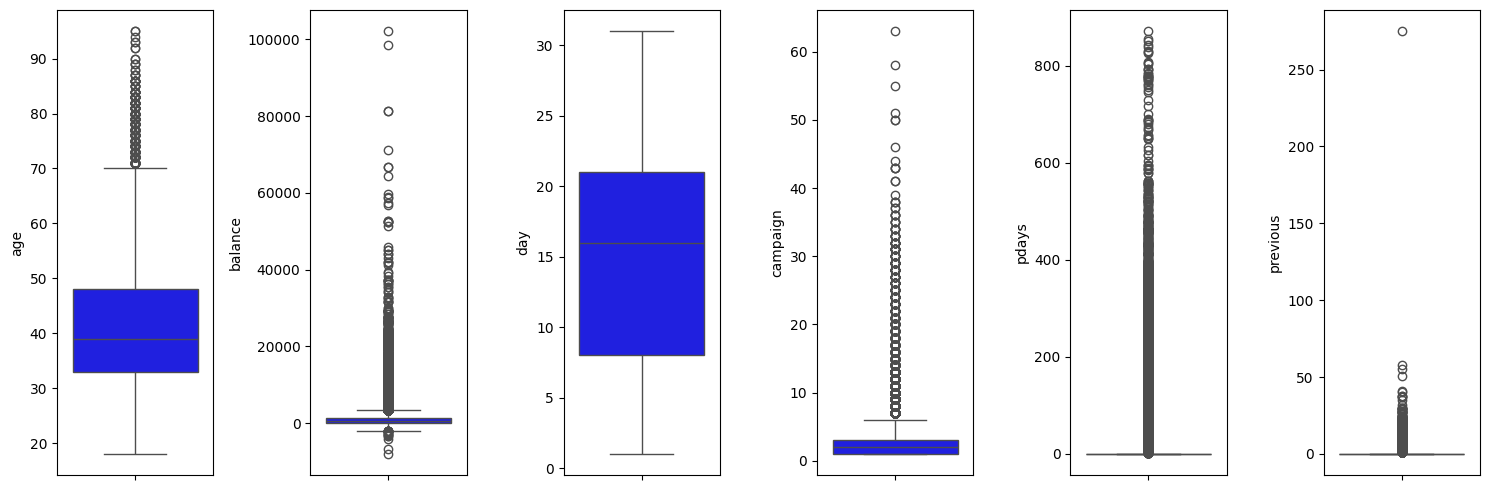

In [ ]:
plt.figure(figsize=(15, 5))
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=raw_df[nums[i]], color='blue', orient='v')
    plt.tight_layout()

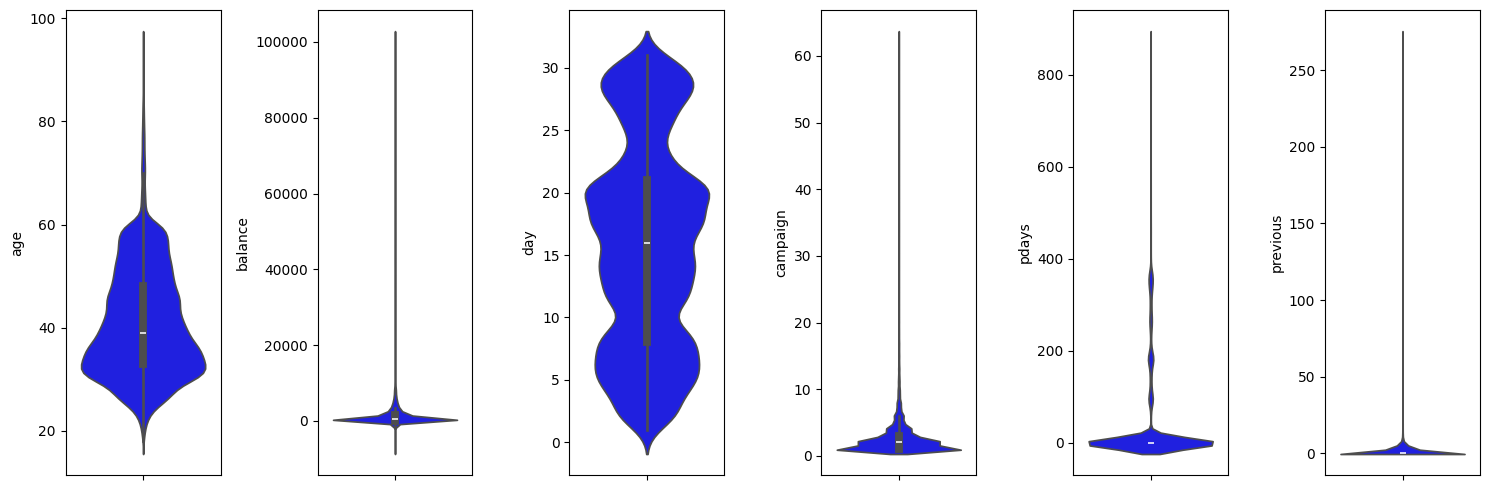

In [ ]:
plt.figure(figsize=(15, 5))
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.violinplot(y=raw_df[nums[i]], color='blue', orient='v')
    plt.tight_layout()

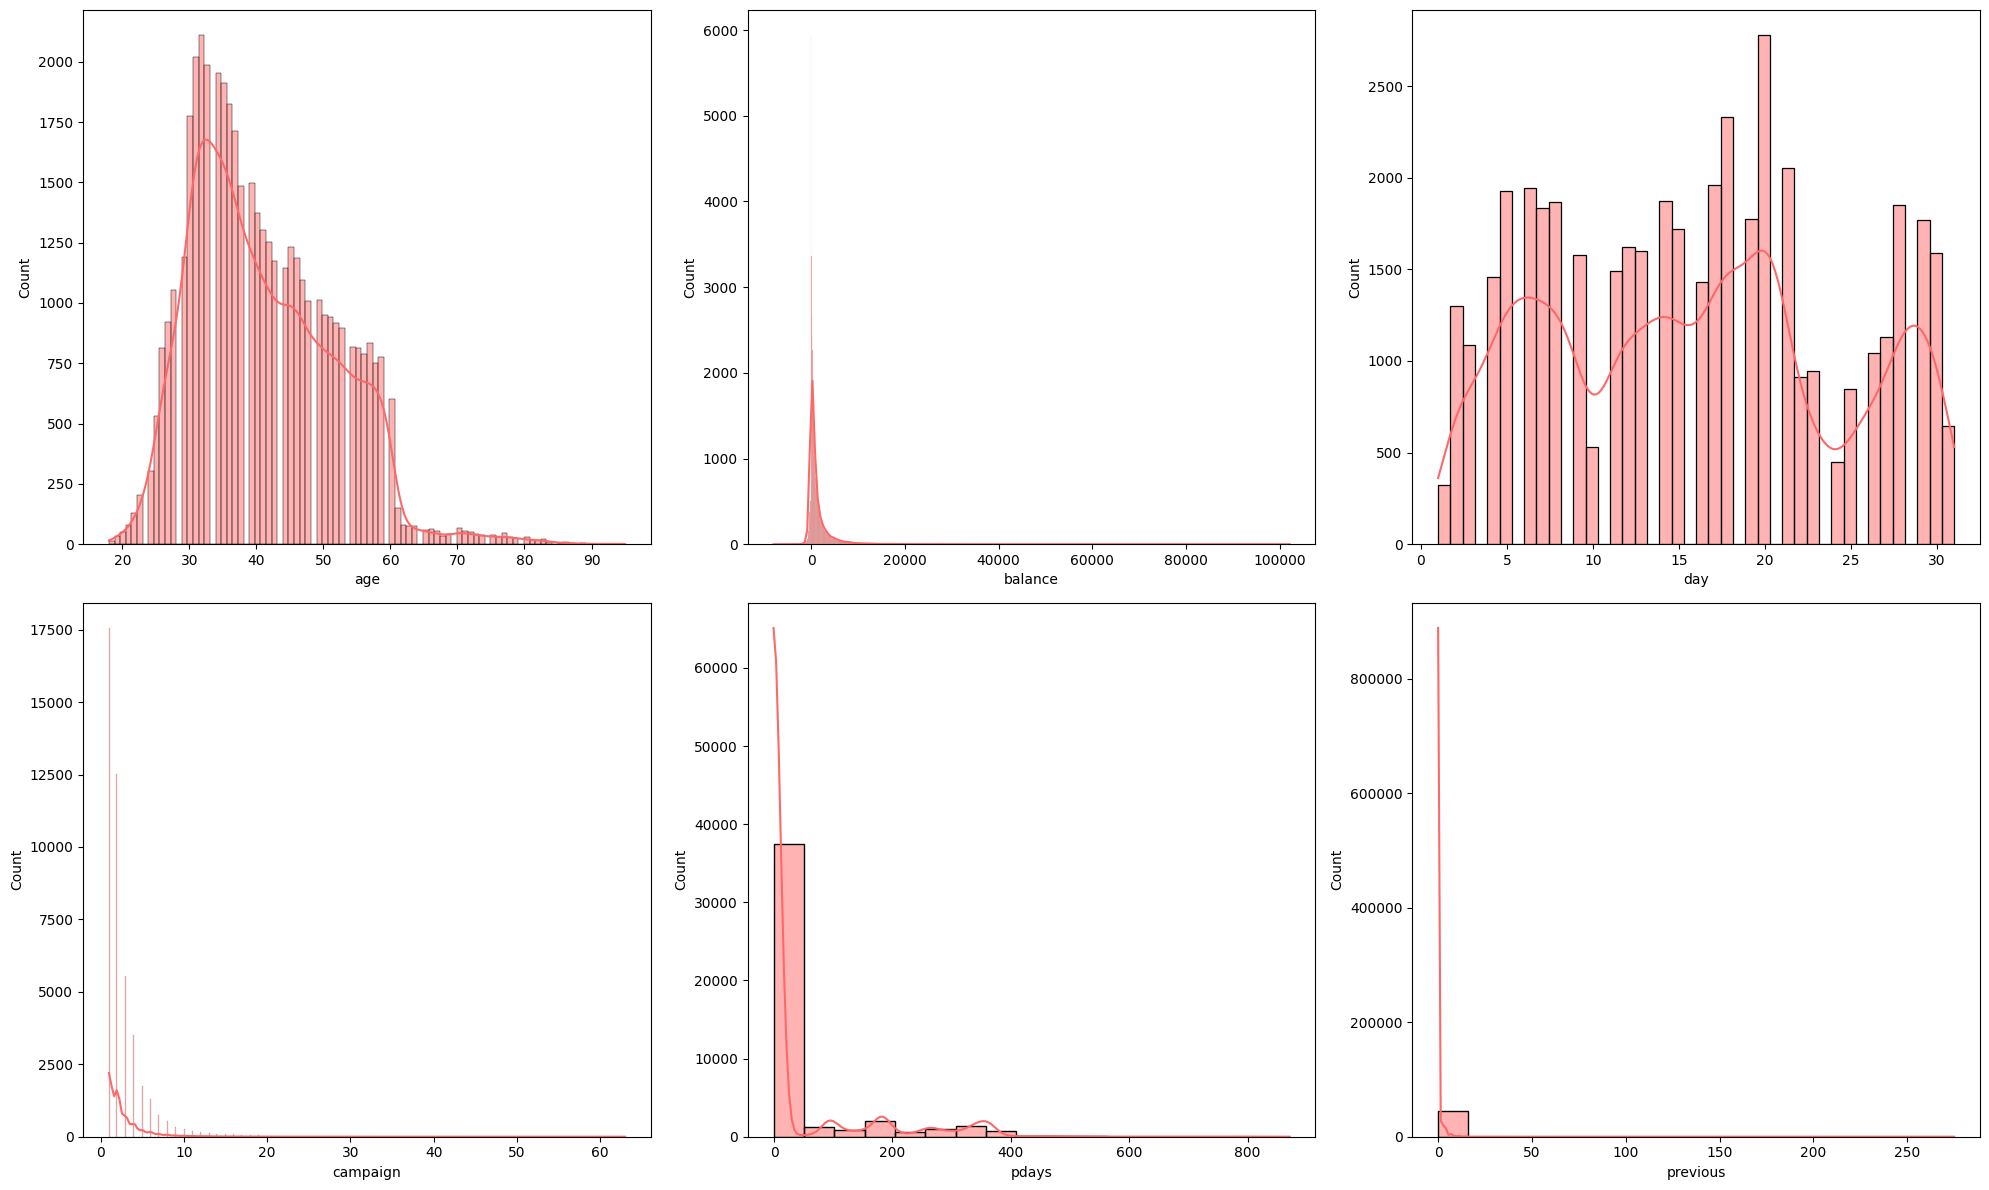

In [ ]:
plt.figure(figsize=(20, 12))
for i in range(1, len(nums) + 1):
    plt.subplot(2, 3, i)
    sns.histplot(raw_df[nums[i - 1]], color='#FF6868', kde=True)
    plt.tight_layout()

plt.show()

<Axes: ylabel='balance'>

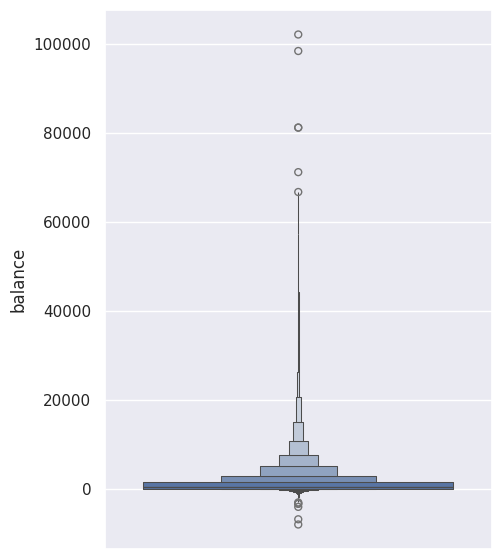

In [ ]:
sns.set(rc={'figure.figsize':(5,7)})
sns.boxenplot(y=raw_df['balance'])

<Axes: ylabel='pdays'>

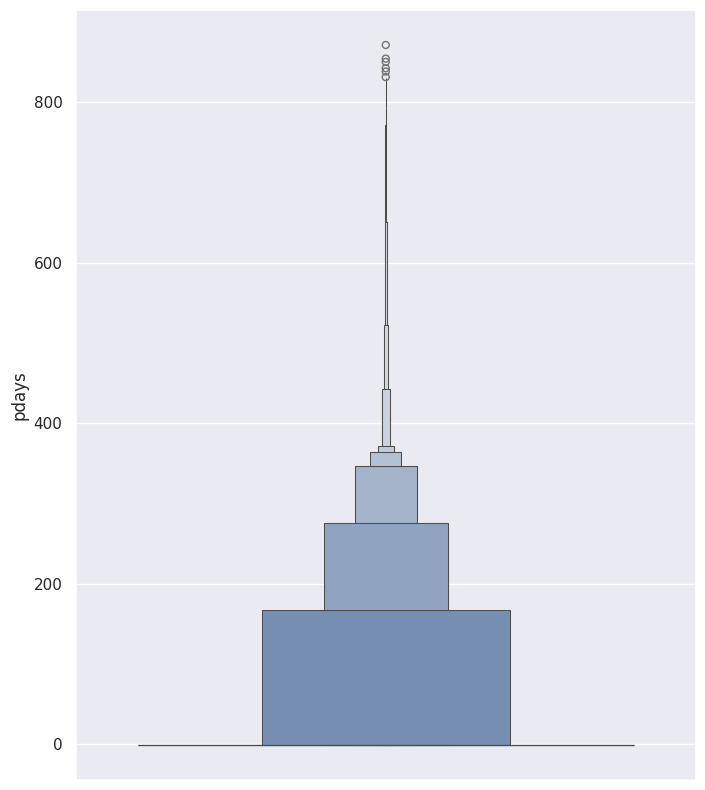

In [ ]:
sns.set(rc={'figure.figsize':(8,10)})
sns.boxenplot(y=raw_df['pdays'])

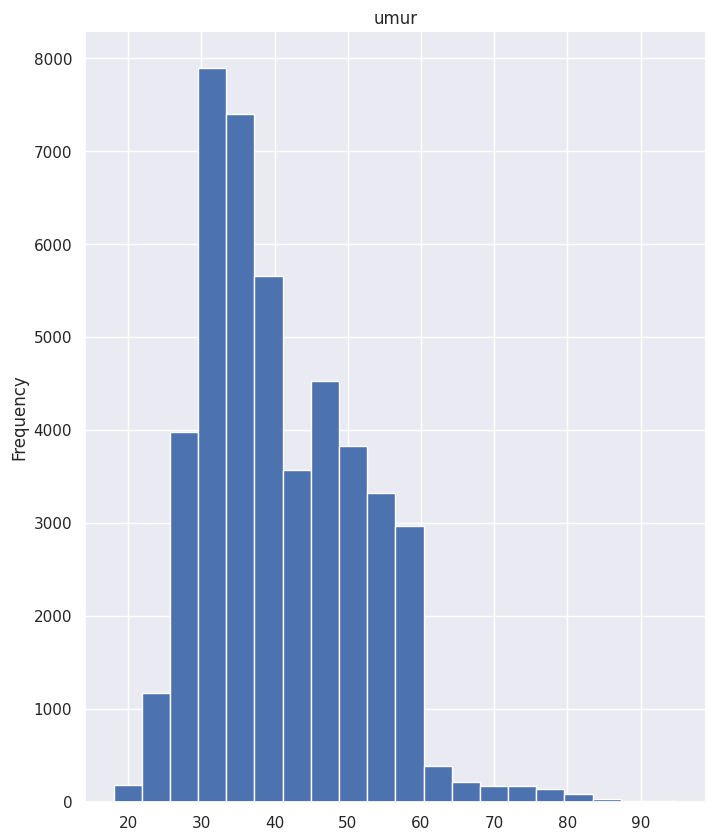

In [ ]:
raw_df['age'].plot(kind='hist', bins=20, title='umur')
plt.gca().spines[['top', 'right',]].set_visible(False)

TypeError: Data source must be a DataFrame or Mapping, not <class 'ellipsis'>.

<Figure size 1000x600 with 0 Axes>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Tentukan batas-batas interval kelompok usia
bins = [1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]

plt.figure(figsize=(10, 6))  # Tentukan ukuran gambar

sns.histplot(data=raw_df, x="age", hue="y", multiple="stack", stat="density", common_norm=False, bins=bins)

# Tambahkan judul dan label
plt.title("Distribusi Umur Pelanggan berdasarkan Status Subscription")
plt.xlabel("Umur")
plt.ylabel("Densitas Pelanggan")

# Atur penanda sumbu x
plt.xticks(range(0, 101, 5))  # Menambahkan penanda setiap 5 tahun

# Tampilkan plot
plt.show()


TypeError: Data source must be a DataFrame or Mapping, not <class 'ellipsis'>.

<Figure size 1000x600 with 0 Axes>

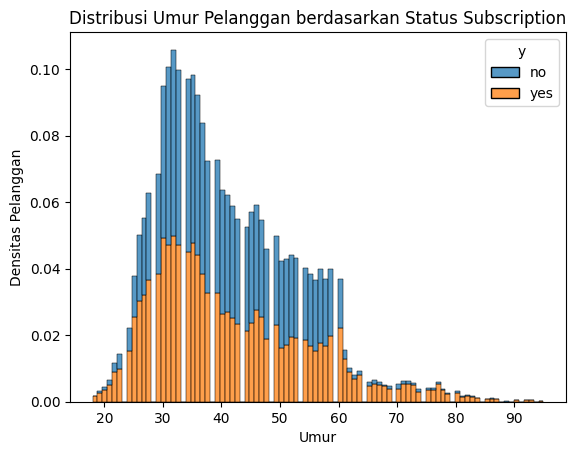

In [18]:
sns.histplot(data=raw_df, x="age", hue="y", multiple="stack", stat="density", common_norm=False)

# Tambahkan judul dan label
plt.title("Distribusi Umur Pelanggan berdasarkan Status Subscription")
plt.xlabel("Umur")
plt.ylabel("Densitas Pelanggan")

# Tampilkan plot
plt.show()

<Axes: xlabel='day', ylabel='Count'>

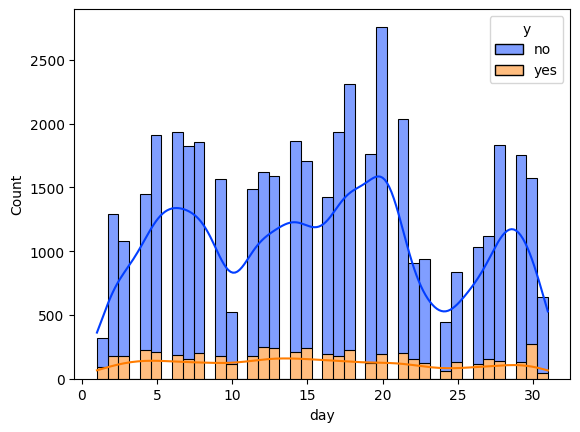

In [19]:
sns.set_palette("bright")
sns.histplot(data=raw_df, x = 'day', hue = "y", multiple="stack", kde=True)

Text(0, 0.5, 'Jumlah Pelanggan')

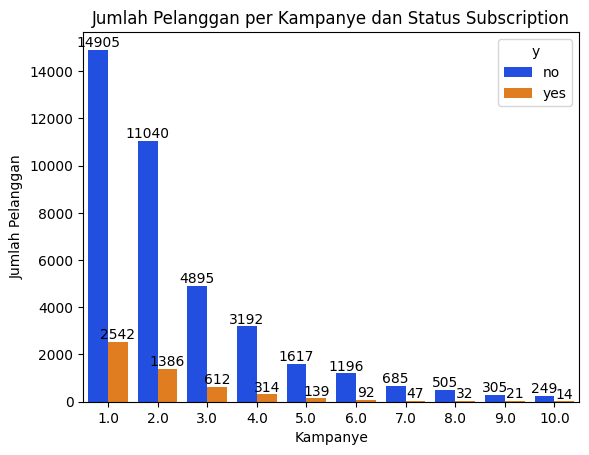

In [20]:
# Batasi kategori
top_categories = raw_df['campaign'].value_counts().sort_values(ascending=False).index[:10]
raw_df = raw_df[raw_df['campaign'].isin(top_categories)]

# Gunakan hue untuk membedakan kategori
ax = sns.countplot(data=raw_df, x='campaign', hue='y')
for cont in ax.containers:
  ax.bar_label(cont)

# Rotasi label sumbu x
plt.xticks(rotation=0)

# Tambahkan judul dan label
plt.title('Jumlah Pelanggan per Kampanye dan Status Subscription')
plt.xlabel('Kampanye')
plt.ylabel('Jumlah Pelanggan')

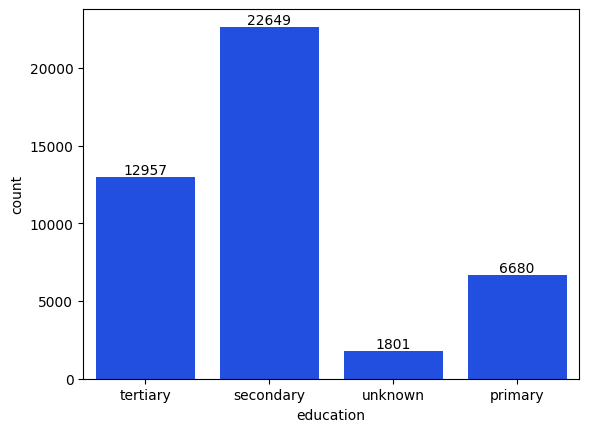

In [21]:
ax = sns.countplot(data=raw_df, x='education')
for cont in ax.containers:
  ax.bar_label(cont)

In [26]:
education_counts = raw_df['education'].value_counts()
education_counts

education
secondary    22649
tertiary     12957
primary       6680
unknown       1801
Name: count, dtype: int64

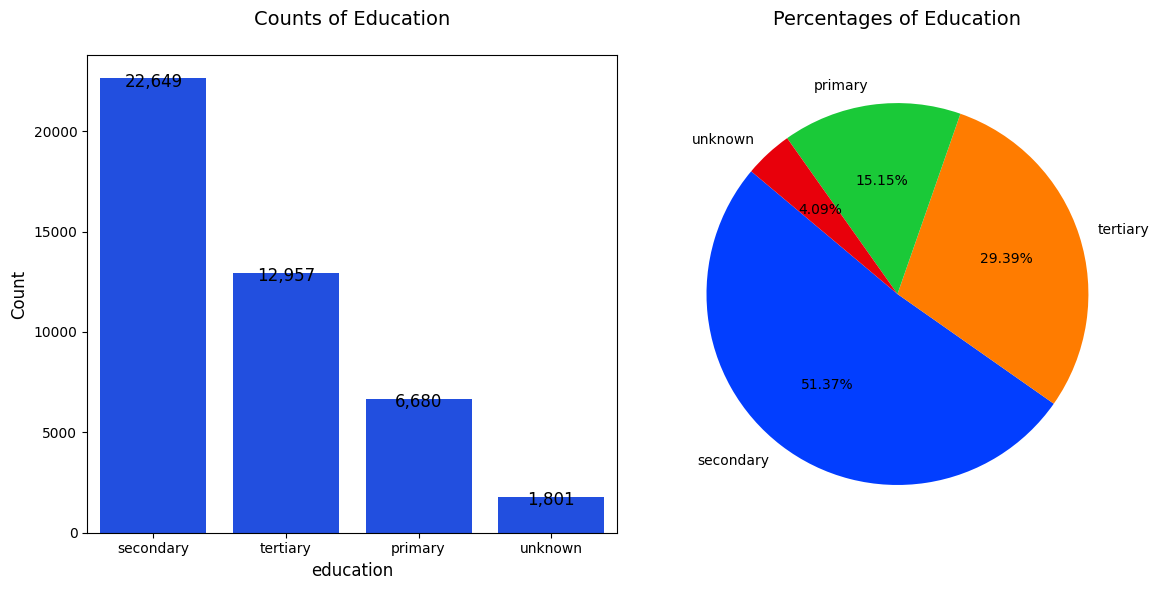

In [23]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
ax = sns.barplot(x=education_counts.index, y=education_counts)
for i, v in enumerate(education_counts):
    bar_height = ax.patches[i].get_height()
    text_pos = bar_height - 180
    ax.text(i, text_pos, f'{v:,}', ha='center', va='center', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xlabel('education', fontsize=12)
plt.title('Counts of Education\n', fontsize=14)

percentages = education_counts / education_counts.sum() * 100

plt.subplot(1, 2, 2)
plt.pie(percentages, labels=percentages.index, autopct='%1.2f%%', startangle=140)
plt.title('Percentages of Education\n', fontsize=14)

plt.tight_layout()
plt.show()

In [27]:
education_counts = raw_df.groupby(['education', 'y'])['campaign'].count().reset_index()
education_counts['ratio'] = education_counts.groupby('education')['campaign'].apply(lambda x: round(x / x.sum() * 100, 0)).astype(int)
education_counts = education_counts[['education', 'y','campaign', 'ratio']]
education_counts

TypeError: incompatible index of inserted column with frame index

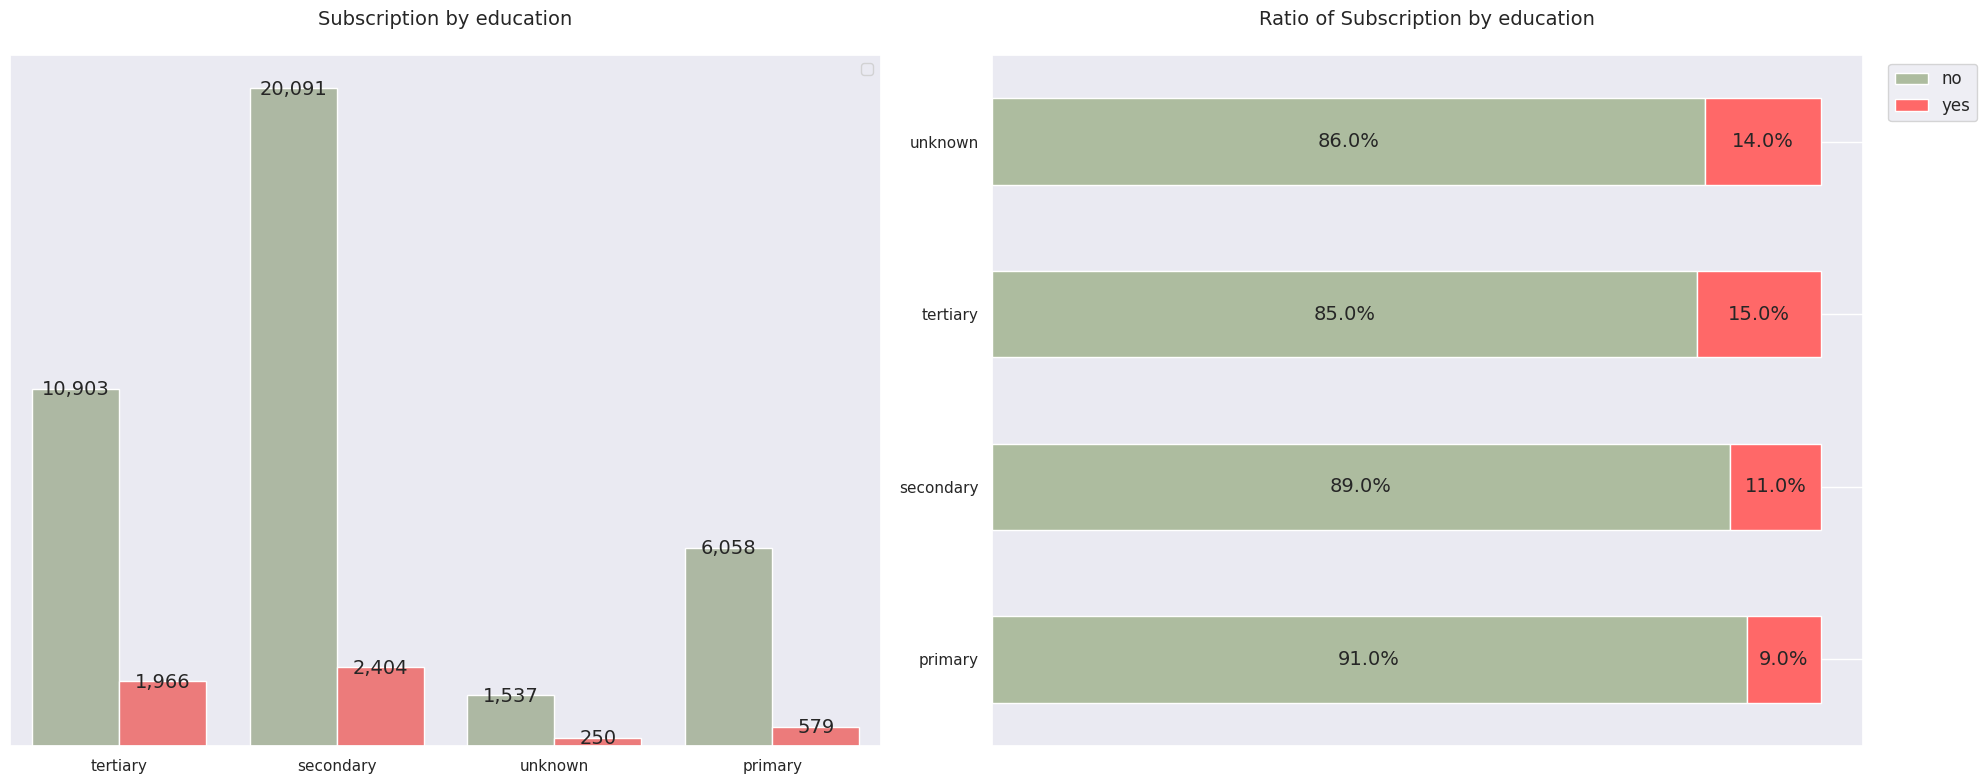

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20, 8))

ax[0].set_title('Subscription by education\n', fontsize=14)
sns.countplot(x='education', data=raw_df, hue='y', palette=['#ADBC9F', '#FF6868'], ax=ax[0])
for i, container in enumerate(ax[0].containers):
    for bar in container:
        bar_height = bar.get_height()
        text_pos = bar_height - 30
        ax[0].annotate(f'{int(bar_height):,}', (bar.get_x() + bar.get_width() / 2, text_pos), ha='center', va='center', fontsize=14)
ax[0].set_yticks([])
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].legend([])

ax[1].set_title('Ratio of Subscription by education\n', fontsize=14)
education_counts.pivot(index='education', columns='y', values='ratio').plot(kind='barh', stacked=True, color=['#ADBC9F', '#FF6868'], ax=ax[1])
for p in ax[1].patches:
    left, bottom, width, height = p.get_bbox().bounds
    if width != 0:
        ax[1].annotate((str(round(width, 2))+'%'), xy=(left+width/2, bottom+height/2), ha='center', va='center', fontsize=14)
ax[1].set_xticks([])
ax[1].set_xlabel('')
ax[1].set_ylabel('')
ax[1].legend(loc='upper left', bbox_to_anchor=(1.02, 1), fontsize='12')

plt.tight_layout()
plt.show()


In [ ]:
y_counts = raw_df['y'].value_counts()
y_counts

no     38589
yes     5199
Name: y, dtype: int64

<ipython-input-27-517378bfcbd8>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=y_counts.index, y=y_counts, palette=['#ADBC9F' , '#FF6868'])


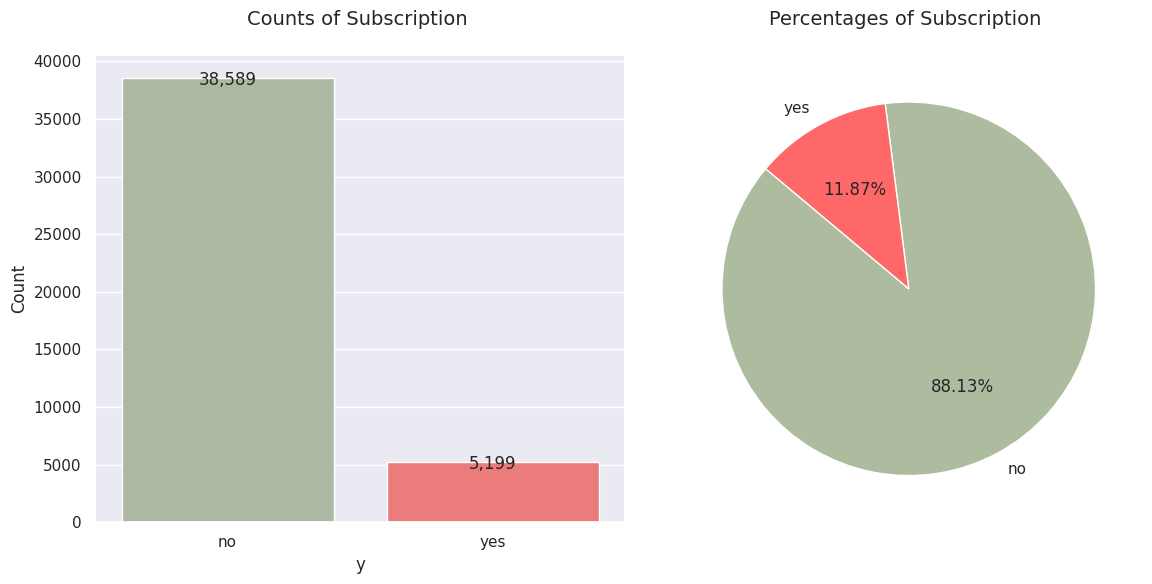

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
ax = sns.barplot(x=y_counts.index, y=y_counts, palette=['#ADBC9F' , '#FF6868'])
for i, v in enumerate(y_counts):
    bar_height = ax.patches[i].get_height()
    text_pos = bar_height - 180
    ax.text(i, text_pos, f'{v:,}', ha='center', va='center', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xlabel('y', fontsize=12)
plt.title('Counts of Subscription \n', fontsize=14)

percentages = y_counts / y_counts.sum() * 100

plt.subplot(1, 2, 2)
plt.pie(percentages, labels=percentages.index, autopct='%1.2f%%', colors=['#ADBC9F' , '#FF6868'], startangle=140)
plt.title('Percentages of Subscription \n', fontsize=14)

plt.tight_layout()
plt.show()

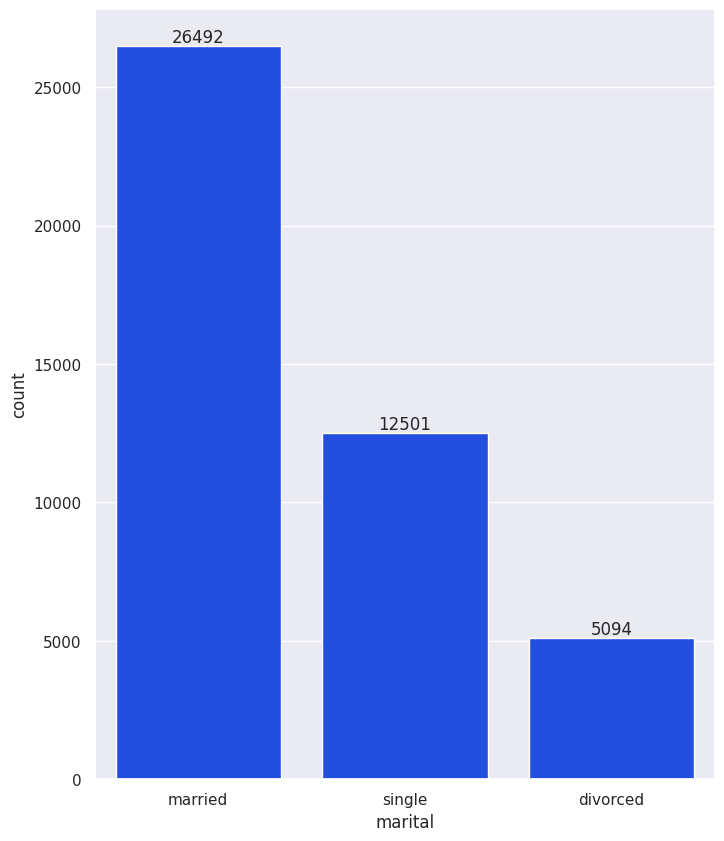

In [ ]:
ax = sns.countplot(data=raw_df, x='marital')
for cont in ax.containers:
  ax.bar_label(cont)

In [ ]:
marital_counts = raw_df.groupby(['marital', 'y'])['campaign'].count().reset_index()
marital_counts['ratio'] = marital_counts.groupby('marital')['campaign'].apply(lambda x: round(x / x.sum() * 100, 0)).astype(int)
marital_counts = marital_counts[['marital', 'y','campaign', 'ratio']]
marital_counts

<ipython-input-29-8caff3097095>:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  marital_counts['ratio'] = marital_counts.groupby('marital')['campaign'].apply(lambda x: round(x / x.sum() * 100, 0)).astype(int)


marital    y  campaign  ratio
0  divorced   no      4453     88
1  divorced  yes       608     12
2   married   no     23609     90
3   married  yes      2708     10
4    single   no     10527     85
5    single  yes      1883     15

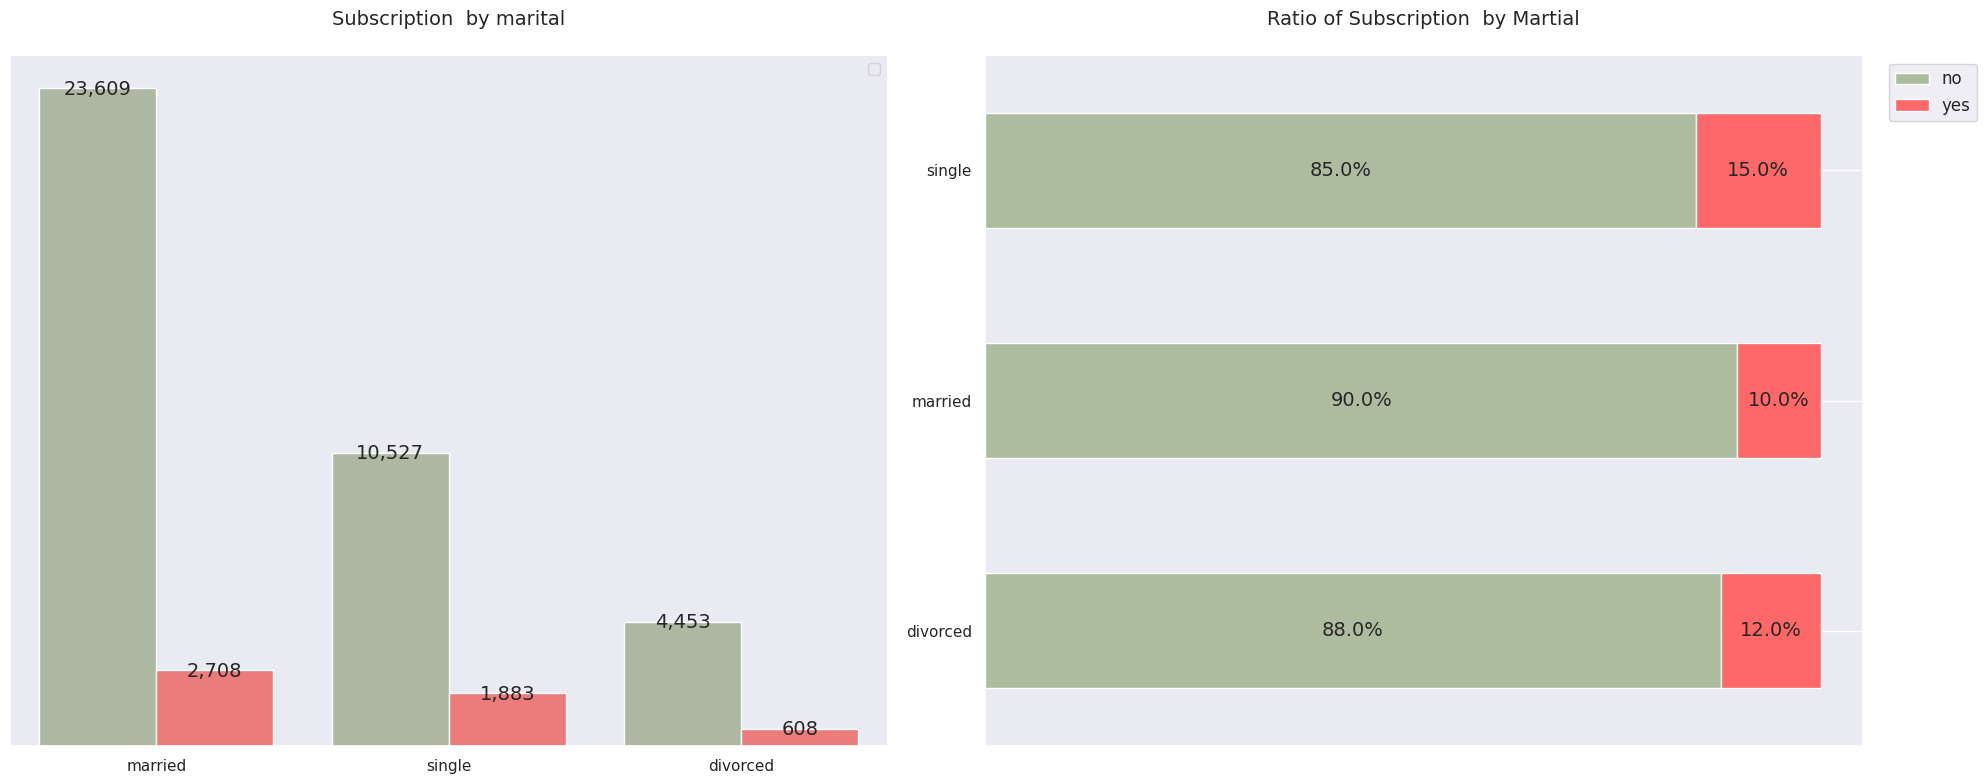

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20, 8))

ax[0].set_title('Subscription  by marital\n', fontsize=14)
sns.countplot(x='marital', data=raw_df, hue='y', palette=['#ADBC9F', '#FF6868'], ax=ax[0])
for i, container in enumerate(ax[0].containers):
    for bar in container:
        bar_height = bar.get_height()
        text_pos = bar_height - 30
        ax[0].annotate(f'{int(bar_height):,}', (bar.get_x() + bar.get_width() / 2, text_pos), ha='center', va='center', fontsize=14)
ax[0].set_yticks([])
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].legend([])

ax[1].set_title('Ratio of Subscription  by Martial\n', fontsize=14)
marital_counts.pivot(index='marital', columns='y', values='ratio').plot(kind='barh', stacked=True, color=['#ADBC9F', '#FF6868'], ax=ax[1])
for p in ax[1].patches:
    left, bottom, width, height = p.get_bbox().bounds
    if width != 0:
        ax[1].annotate((str(round(width, 2))+'%'), xy=(left+width/2, bottom+height/2), ha='center', va='center', fontsize=14)
ax[1].set_xticks([])
ax[1].set_xlabel('')
ax[1].set_ylabel('')
ax[1].legend(loc='upper left', bbox_to_anchor=(1.02, 1), fontsize='12')

plt.tight_layout()
plt.show()


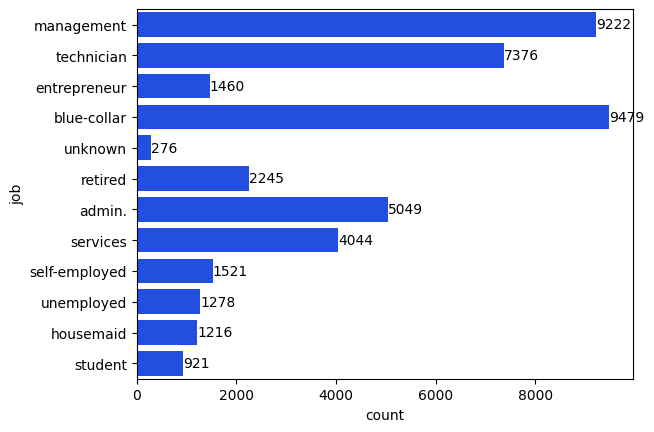

In [29]:

ax = sns.countplot(data=raw_df, y='job', hue='y')
for cont in ax.containers:
  ax.bar_label(cont)

Text(0.5, 1.0, 'Subscription by job\n')

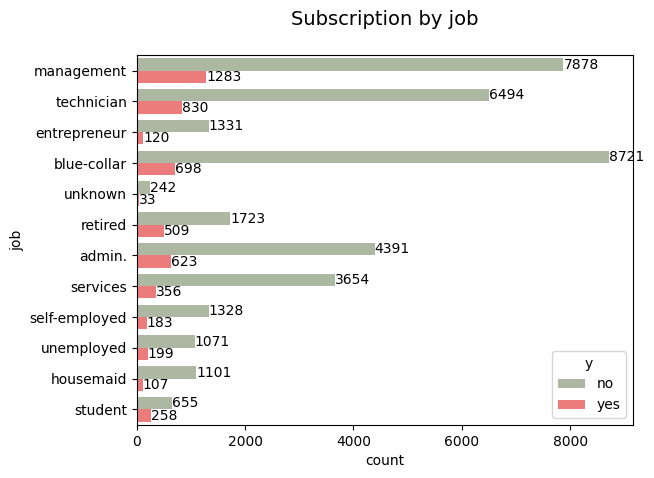

In [41]:

ax1 = sns.countplot(data=raw_df, y='job', hue='y', palette=['#ADBC9F', '#FF6868'])
for cont in ax1.containers:
  ax1.bar_label(cont)
ax1.set_title('Subscription by job\n', fontsize=14)
ax1

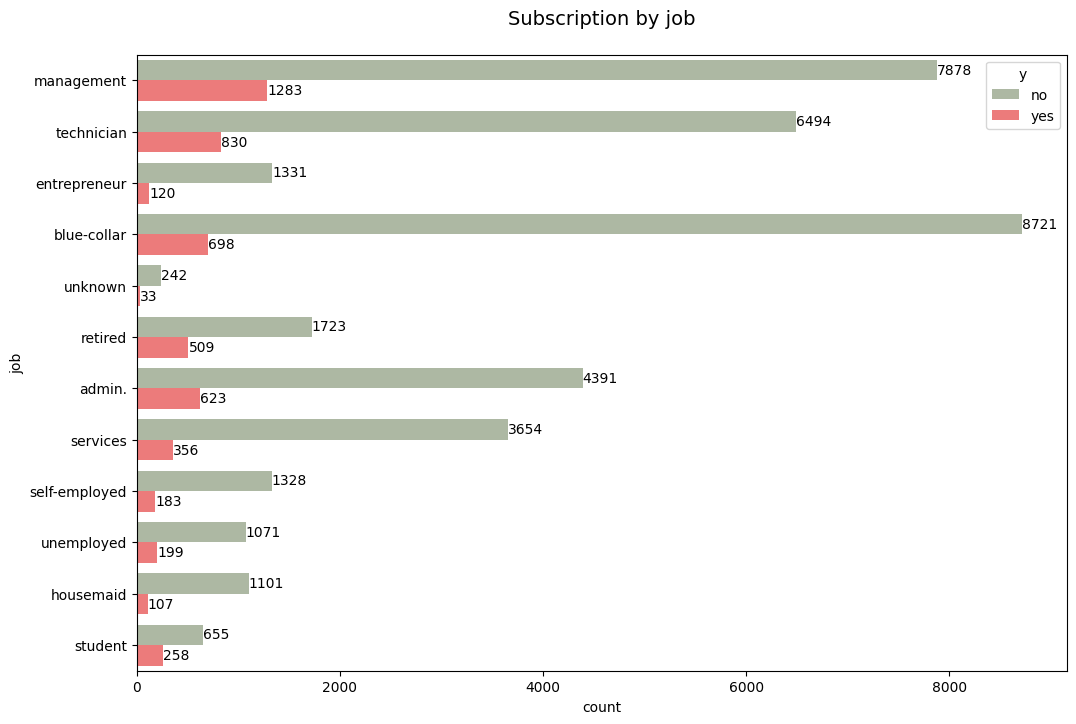

In [49]:
fig, ax1 = plt.subplots(figsize=(12, 8))

sns.countplot(data=raw_df, y='job', hue='y', palette=['#ADBC9F', '#FF6868'], ax=ax1)
for cont in ax1.containers:
    ax1.bar_label(cont)

ax1.set_title('Subscription by job\n', fontsize=14)
plt.show()

In [30]:
job_counts = raw_df.groupby(['job', 'y'])['balance'].count().reset_index()
job_counts['ratio'] = job_counts.groupby('job')['balance'].apply(lambda x: round(x / x.sum() * 100, 0)).astype(int)
job_counts = job_counts[['job', 'y','balance', 'ratio']]
job_counts

TypeError: incompatible index of inserted column with frame index

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(10, 16))

ax[0].set_title('Subscription by job\n', fontsize=14)
sns.countplot(y='job', data=raw_df, hue='y', palette=['#ADBC9F', '#FF6868'], ax=ax[0])
for i, container in enumerate(ax[0].containers):
    for bar in container:
        bar_width = bar.get_width()
        text_pos = bar_width - 10
        ax[0].annotate(f'{int(bar_width):,}', (text_pos, bar.get_y() + bar.get_height() / 2), va='center', fontsize=14)
ax[0].set_xticks([])
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].legend([])

ax[1].set_title('Ratio of Subscription by job\n', fontsize=14)
job_counts.pivot(index='job', columns='y', values='ratio').plot(kind='bar', stacked=True, color=['#ADBC9F', '#FF6868'], ax=ax[1])
for p in ax[1].patches:
    left, bottom, width, height = p.get_bbox().bounds
    if height != 0:
        ax[1].annotate((str(round(height, 2))+'%'), xy=(left+width/2, bottom+height/2), ha='center', fontsize=14)
ax[1].set_yticks([])
ax[1].set_xlabel('')
ax[1].set_ylabel('')
ax[1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fontsize='12')

plt.tight_layout()
plt.show()


NameError: name 'plt' is not defined

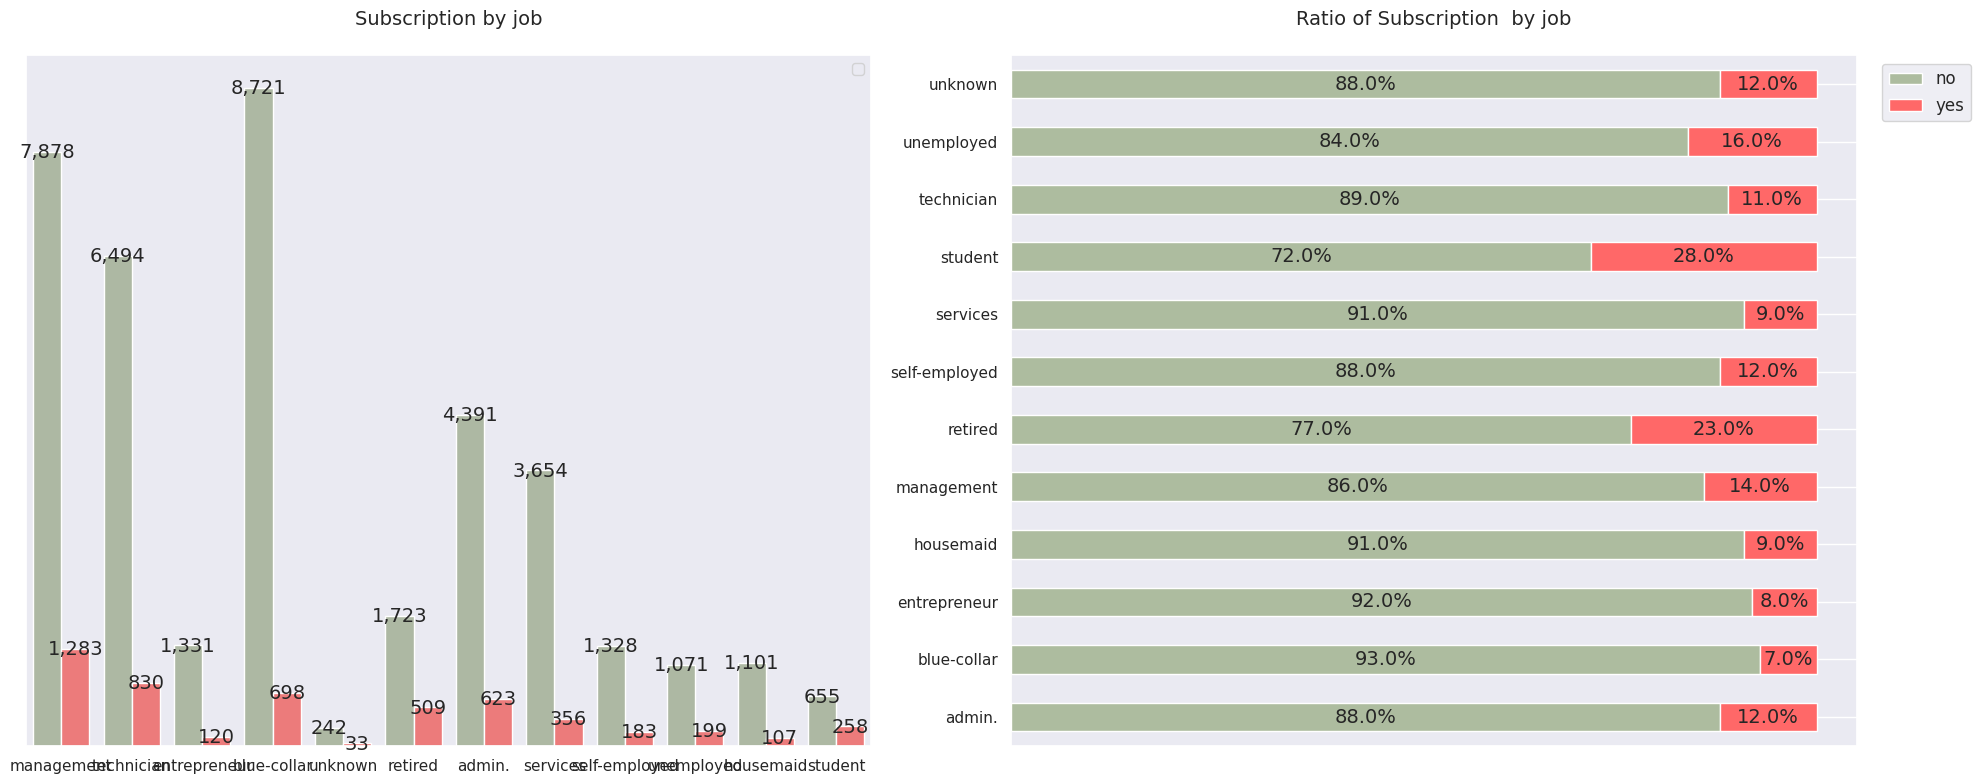

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20, 8))

ax[0].set_title('Subscription by job\n', fontsize=14)
sns.countplot(x='job', data=raw_df, hue='y', palette=['#ADBC9F', '#FF6868'], ax=ax[0])
for i, container in enumerate(ax[0].containers):
    for bar in container:
        bar_height = bar.get_height()
        text_pos = bar_height - 10
        ax[0].annotate(f'{int(bar_height):,}', (bar.get_x() + bar.get_width() / 2, text_pos), ha='center', va='center', fontsize=14)
ax[0].set_yticks([])
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].legend([])

ax[1].set_title('Ratio of Subscription  by job\n', fontsize=14)
job_counts.pivot(index='job', columns='y', values='ratio').plot(kind='barh', stacked=True, color=['#ADBC9F', '#FF6868'], ax=ax[1])
for p in ax[1].patches:
    left, bottom, width, height = p.get_bbox().bounds
    if width != 0:
        ax[1].annotate((str(round(width, 2))+'%'), xy=(left+width/2, bottom+height/2), ha='center', va='center', fontsize=14)
ax[1].set_xticks([])
ax[1].set_xlabel('')
ax[1].set_ylabel('')
ax[1].legend(loc='upper left', bbox_to_anchor=(1.02, 1), fontsize='12')

plt.tight_layout()
plt.show()

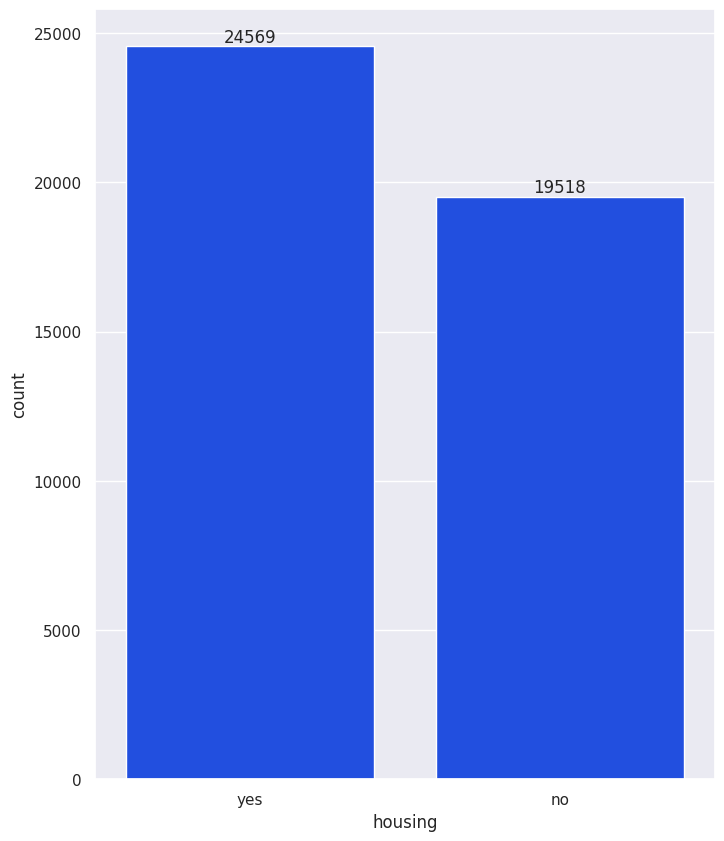

In [ ]:
ax = sns.countplot(data=raw_df, x='housing')
for cont in ax.containers:
  ax.bar_label(cont)

In [ ]:
housing_counts = raw_df.groupby(['housing', 'y'])['balance'].count().reset_index()
housing_counts['ratio'] = housing_counts.groupby('housing')['balance'].apply(lambda x: round(x / x.sum() * 100, 0)).astype(int)
housing_counts = housing_counts[['housing', 'y','balance', 'ratio']]
housing_counts

<ipython-input-62-875d2dc1156e>:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  housing_counts['ratio'] = housing_counts.groupby('housing')['balance'].apply(lambda x: round(x / x.sum() * 100, 0)).astype(int)


housing    y  balance  ratio
0      no   no    16083     83
1      no  yes     3299     17
2     yes   no    22506     92
3     yes  yes     1900      8

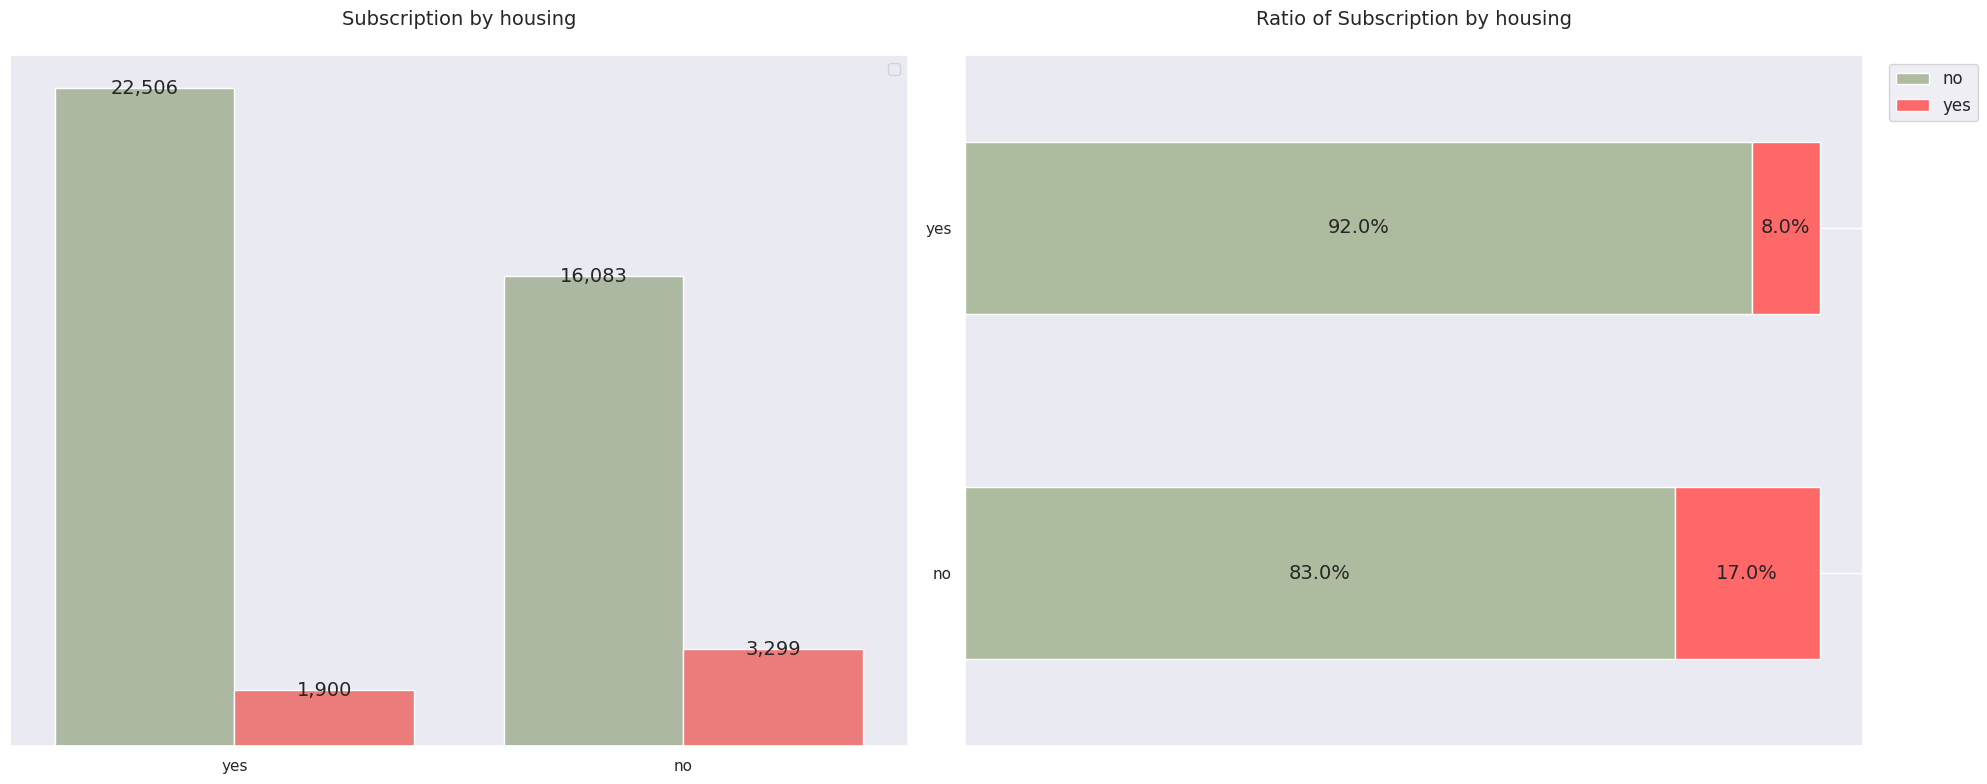

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20, 8))

ax[0].set_title('Subscription by housing\n', fontsize=14)
sns.countplot(x='housing', data=raw_df, hue='y', palette=['#ADBC9F', '#FF6868'], ax=ax[0])
for i, container in enumerate(ax[0].containers):
    for bar in container:
        bar_height = bar.get_height()
        text_pos = bar_height - 10
        ax[0].annotate(f'{int(bar_height):,}', (bar.get_x() + bar.get_width() / 2, text_pos), ha='center', va='center', fontsize=14)
ax[0].set_yticks([])
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].legend([])

ax[1].set_title('Ratio of Subscription by housing\n', fontsize=14)
housing_counts.pivot(index='housing', columns='y', values='ratio').plot(kind='barh', stacked=True, color=['#ADBC9F', '#FF6868'], ax=ax[1])
for p in ax[1].patches:
    left, bottom, width, height = p.get_bbox().bounds
    if width != 0:
        ax[1].annotate((str(round(width, 2))+'%'), xy=(left+width/2, bottom+height/2), ha='center', va='center', fontsize=14)
ax[1].set_xticks([])
ax[1].set_xlabel('')
ax[1].set_ylabel('')
ax[1].legend(loc='upper left', bbox_to_anchor=(1.02, 1), fontsize='12')

plt.tight_layout()
plt.show()

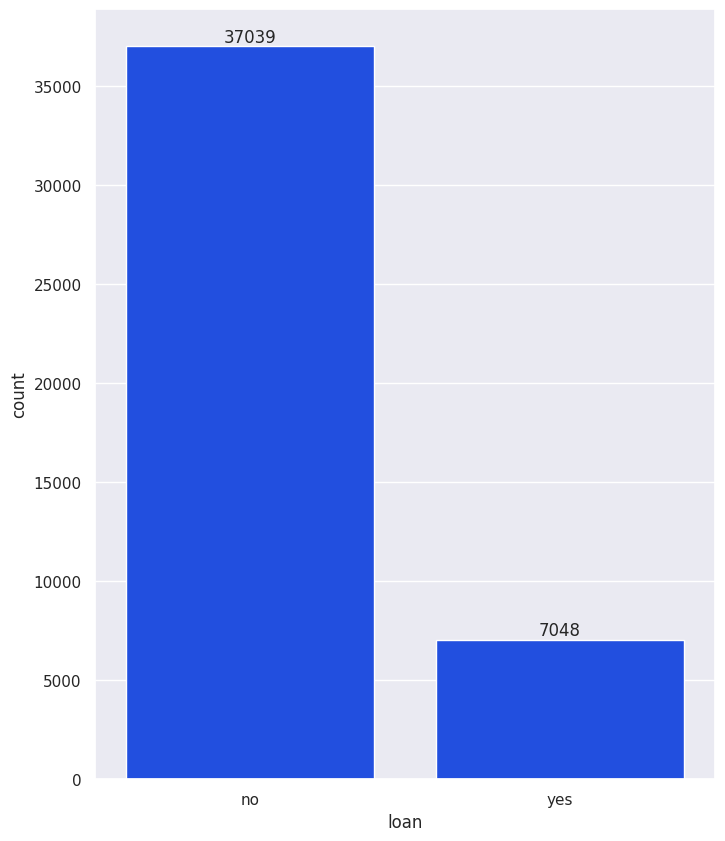

In [ ]:
ax = sns.countplot(data=raw_df, x='loan')
for cont in ax.containers:
  ax.bar_label(cont)

In [ ]:
loan_counts = raw_df.groupby(['loan', 'y'])['balance'].count().reset_index()
loan_counts['ratio'] = loan_counts.groupby('loan')['balance'].apply(lambda x: round(x / x.sum() * 100, 0)).astype(int)
loan_counts = loan_counts[['loan', 'y','balance', 'ratio']]
loan_counts

<ipython-input-65-32681b294ab0>:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  loan_counts['ratio'] = loan_counts.groupby('loan')['balance'].apply(lambda x: round(x / x.sum() * 100, 0)).astype(int)


loan    y  balance  ratio
0   no   no    32068     87
1   no  yes     4723     13
2  yes   no     6521     93
3  yes  yes      476      7

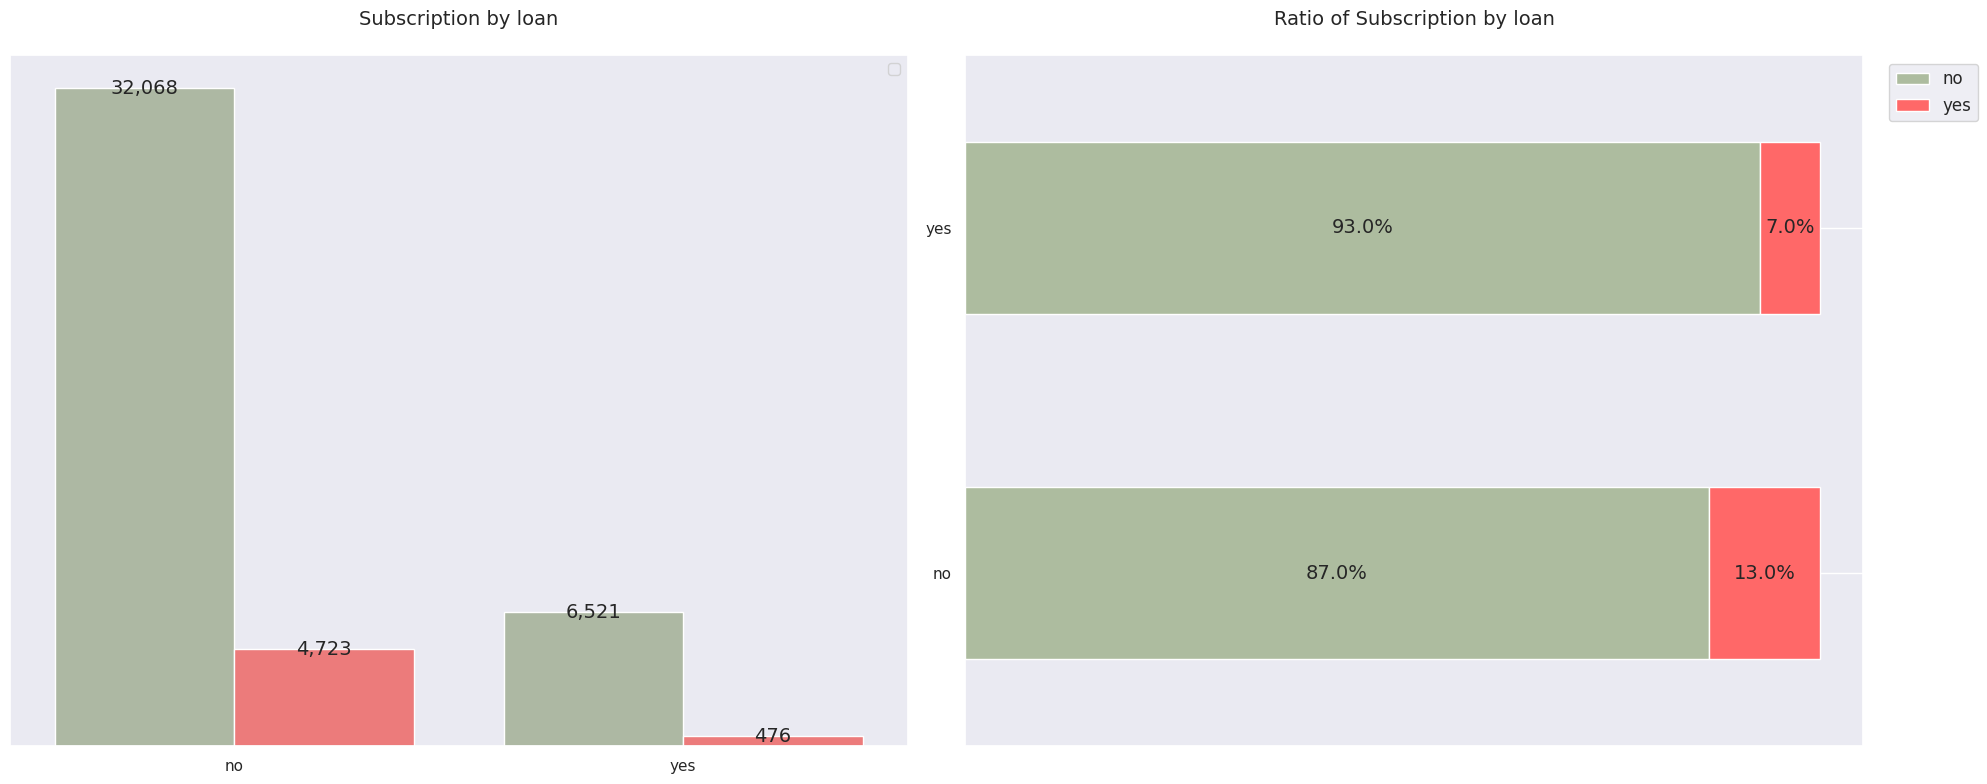

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20, 8))

ax[0].set_title('Subscription by loan\n', fontsize=14)
sns.countplot(x='loan', data=raw_df, hue='y', palette=['#ADBC9F', '#FF6868'], ax=ax[0])
for i, container in enumerate(ax[0].containers):
    for bar in container:
        bar_height = bar.get_height()
        text_pos = bar_height - 10
        ax[0].annotate(f'{int(bar_height):,}', (bar.get_x() + bar.get_width() / 2, text_pos), ha='center', va='center', fontsize=14)
ax[0].set_yticks([])
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].legend([])

ax[1].set_title('Ratio of Subscription by loan\n', fontsize=14)
loan_counts.pivot(index='loan', columns='y', values='ratio').plot(kind='barh', stacked=True, color=['#ADBC9F', '#FF6868'], ax=ax[1])
for p in ax[1].patches:
    left, bottom, width, height = p.get_bbox().bounds
    if width != 0:
        ax[1].annotate((str(round(width, 2))+'%'), xy=(left+width/2, bottom+height/2), ha='center', va='center', fontsize=14)
ax[1].set_xticks([])
ax[1].set_xlabel('')
ax[1].set_ylabel('')
ax[1].legend(loc='upper left', bbox_to_anchor=(1.02, 1), fontsize='12')

plt.tight_layout()
plt.show()

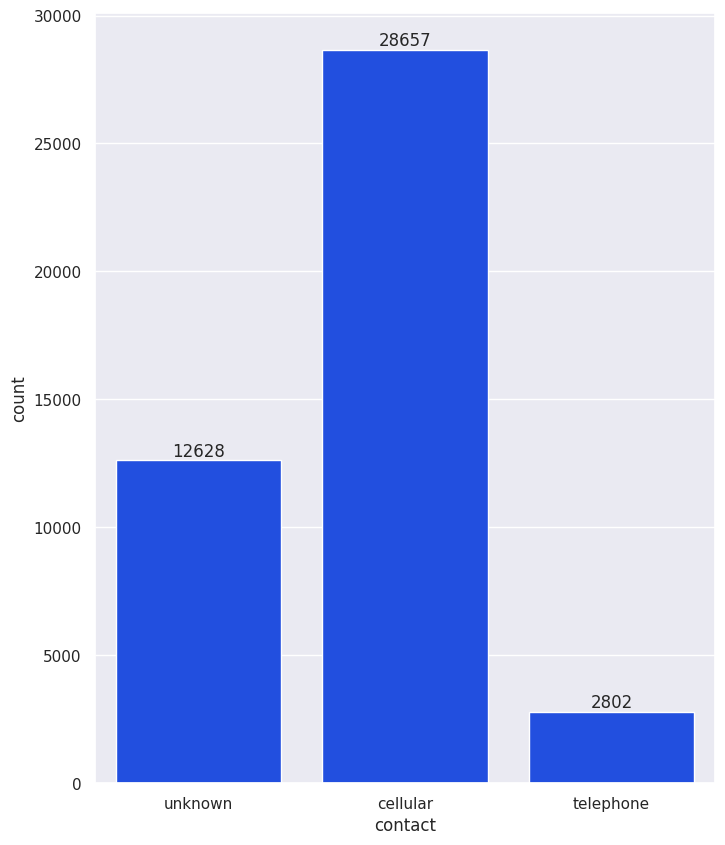

In [ ]:
ax = sns.countplot(data=raw_df, x='contact')
for cont in ax.containers:
  ax.bar_label(cont)

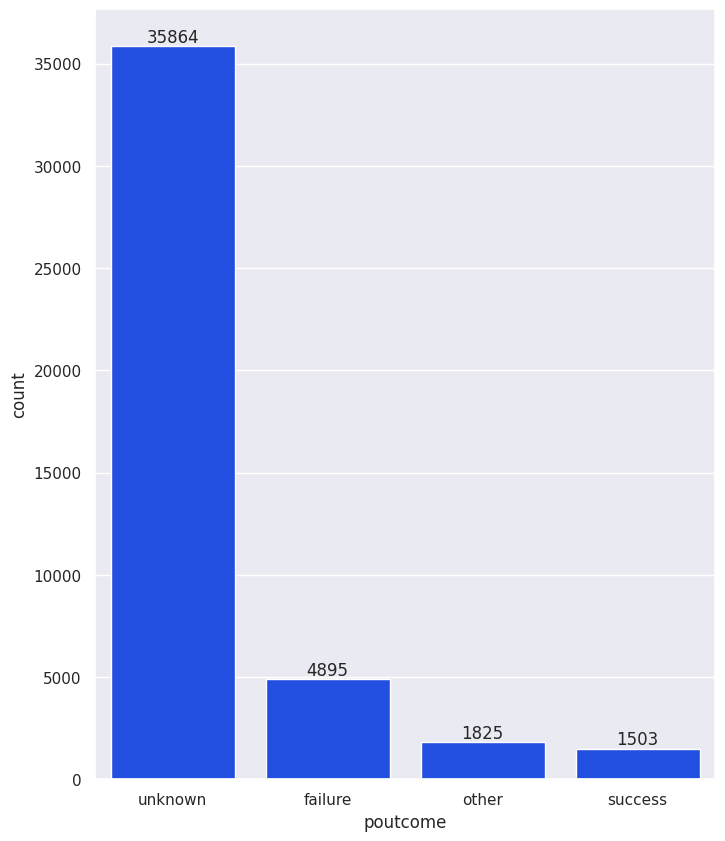

In [ ]:

ax = sns.countplot(data=raw_df, x='poutcome')
for cont in ax.containers:
  ax.bar_label(cont)

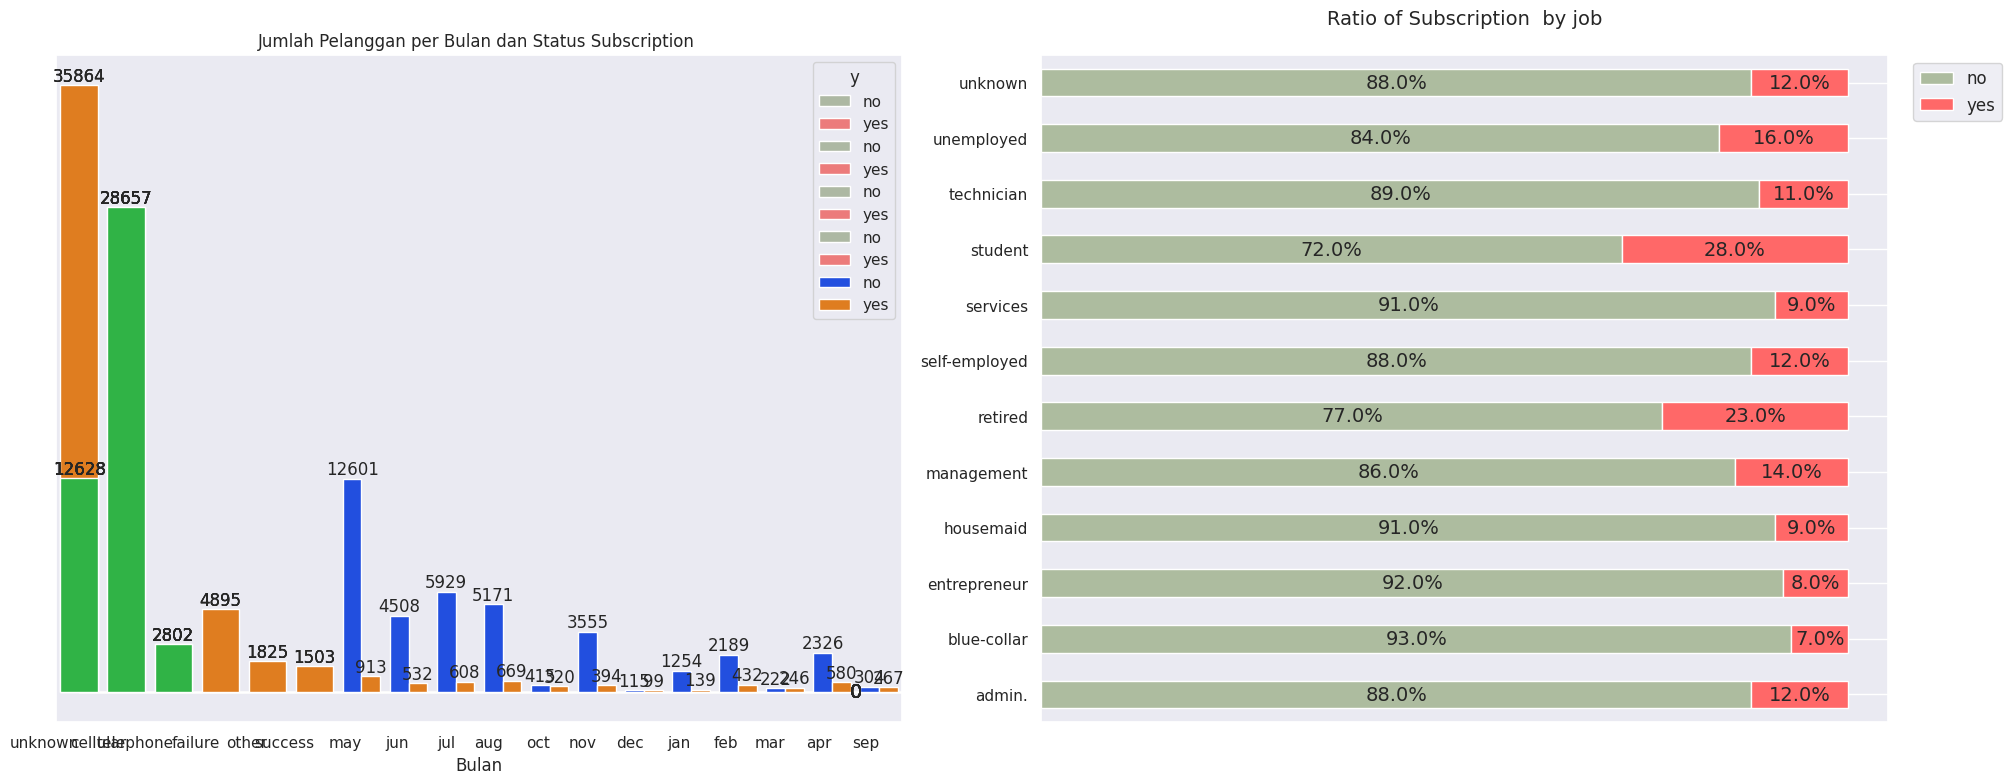

In [ ]:
# Batasi kategori
top_categories = raw_df['month'].value_counts().sort_values(ascending=False).index[:12]
raw_df = raw_df[raw_df['month'].isin(top_categories)]

# Buat plot
ax = sns.countplot(data=raw_df, x='month', hue='y')
for container in ax.containers:
    ax.bar_label(container)

# Rotasi label sumbu x
plt.xticks(rotation=0)

# Tambahkan judul dan label
plt.title('Jumlah Pelanggan per Bulan dan Status Subscription ')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Pelanggan')

# Tampilkan plot
plt.show()

# Multivariate Analysis

In [ ]:
raw_df.corr()

<ipython-input-40-d78189c2f58f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  raw_df.corr()


age   balance       day  duration  campaign     pdays  previous
age       1.000000  0.096844 -0.009060 -0.005739  0.026032 -0.023762  0.002298
balance   0.096844  1.000000  0.007336  0.021388 -0.011083  0.003199  0.016764
day      -0.009060  0.007336  1.000000 -0.021472  0.121539 -0.087291 -0.048667
duration -0.005739  0.021388 -0.021472  1.000000 -0.050598 -0.005818 -0.000963
campaign  0.026032 -0.011083  0.121539 -0.050598  1.000000 -0.076470 -0.011185
pdays    -0.023762  0.003199 -0.087291 -0.005818 -0.076470  1.000000  0.453627
previous  0.002298  0.016764 -0.048667 -0.000963 -0.011185  0.453627  1.000000

<ipython-input-41-b101fa6aa056>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(raw_df.corr(), cmap="YlGnBu", annot=True, fmt='.2f')


<Axes: >

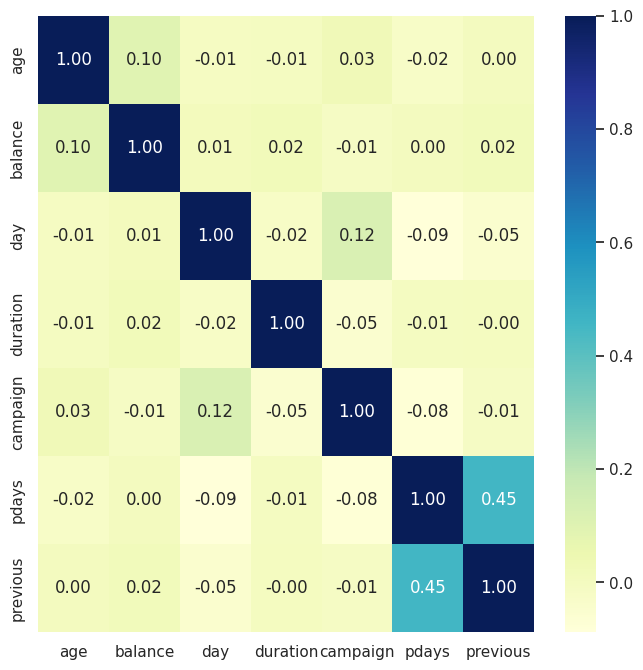

In [ ]:
plt.figure(figsize=(8, 8))
sns.heatmap(raw_df.corr(), cmap="YlGnBu", annot=True, fmt='.2f')

<ipython-input-42-3e98d8596b25>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(raw_df.corr(method='spearman'), cmap="YlGnBu", annot=True)


<Axes: >

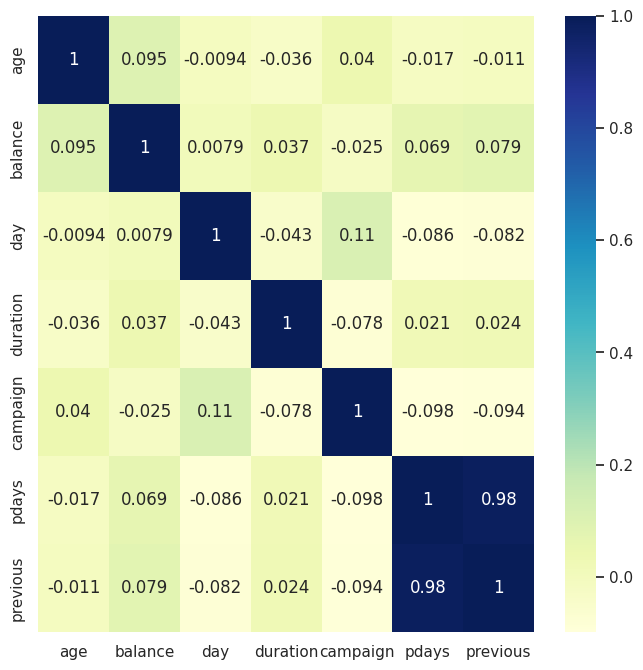

In [ ]:
plt.figure(figsize=(8, 8))
sns.heatmap(raw_df.corr(method='spearman'), cmap="YlGnBu", annot=True)

<Figure size 1000x800 with 0 Axes>

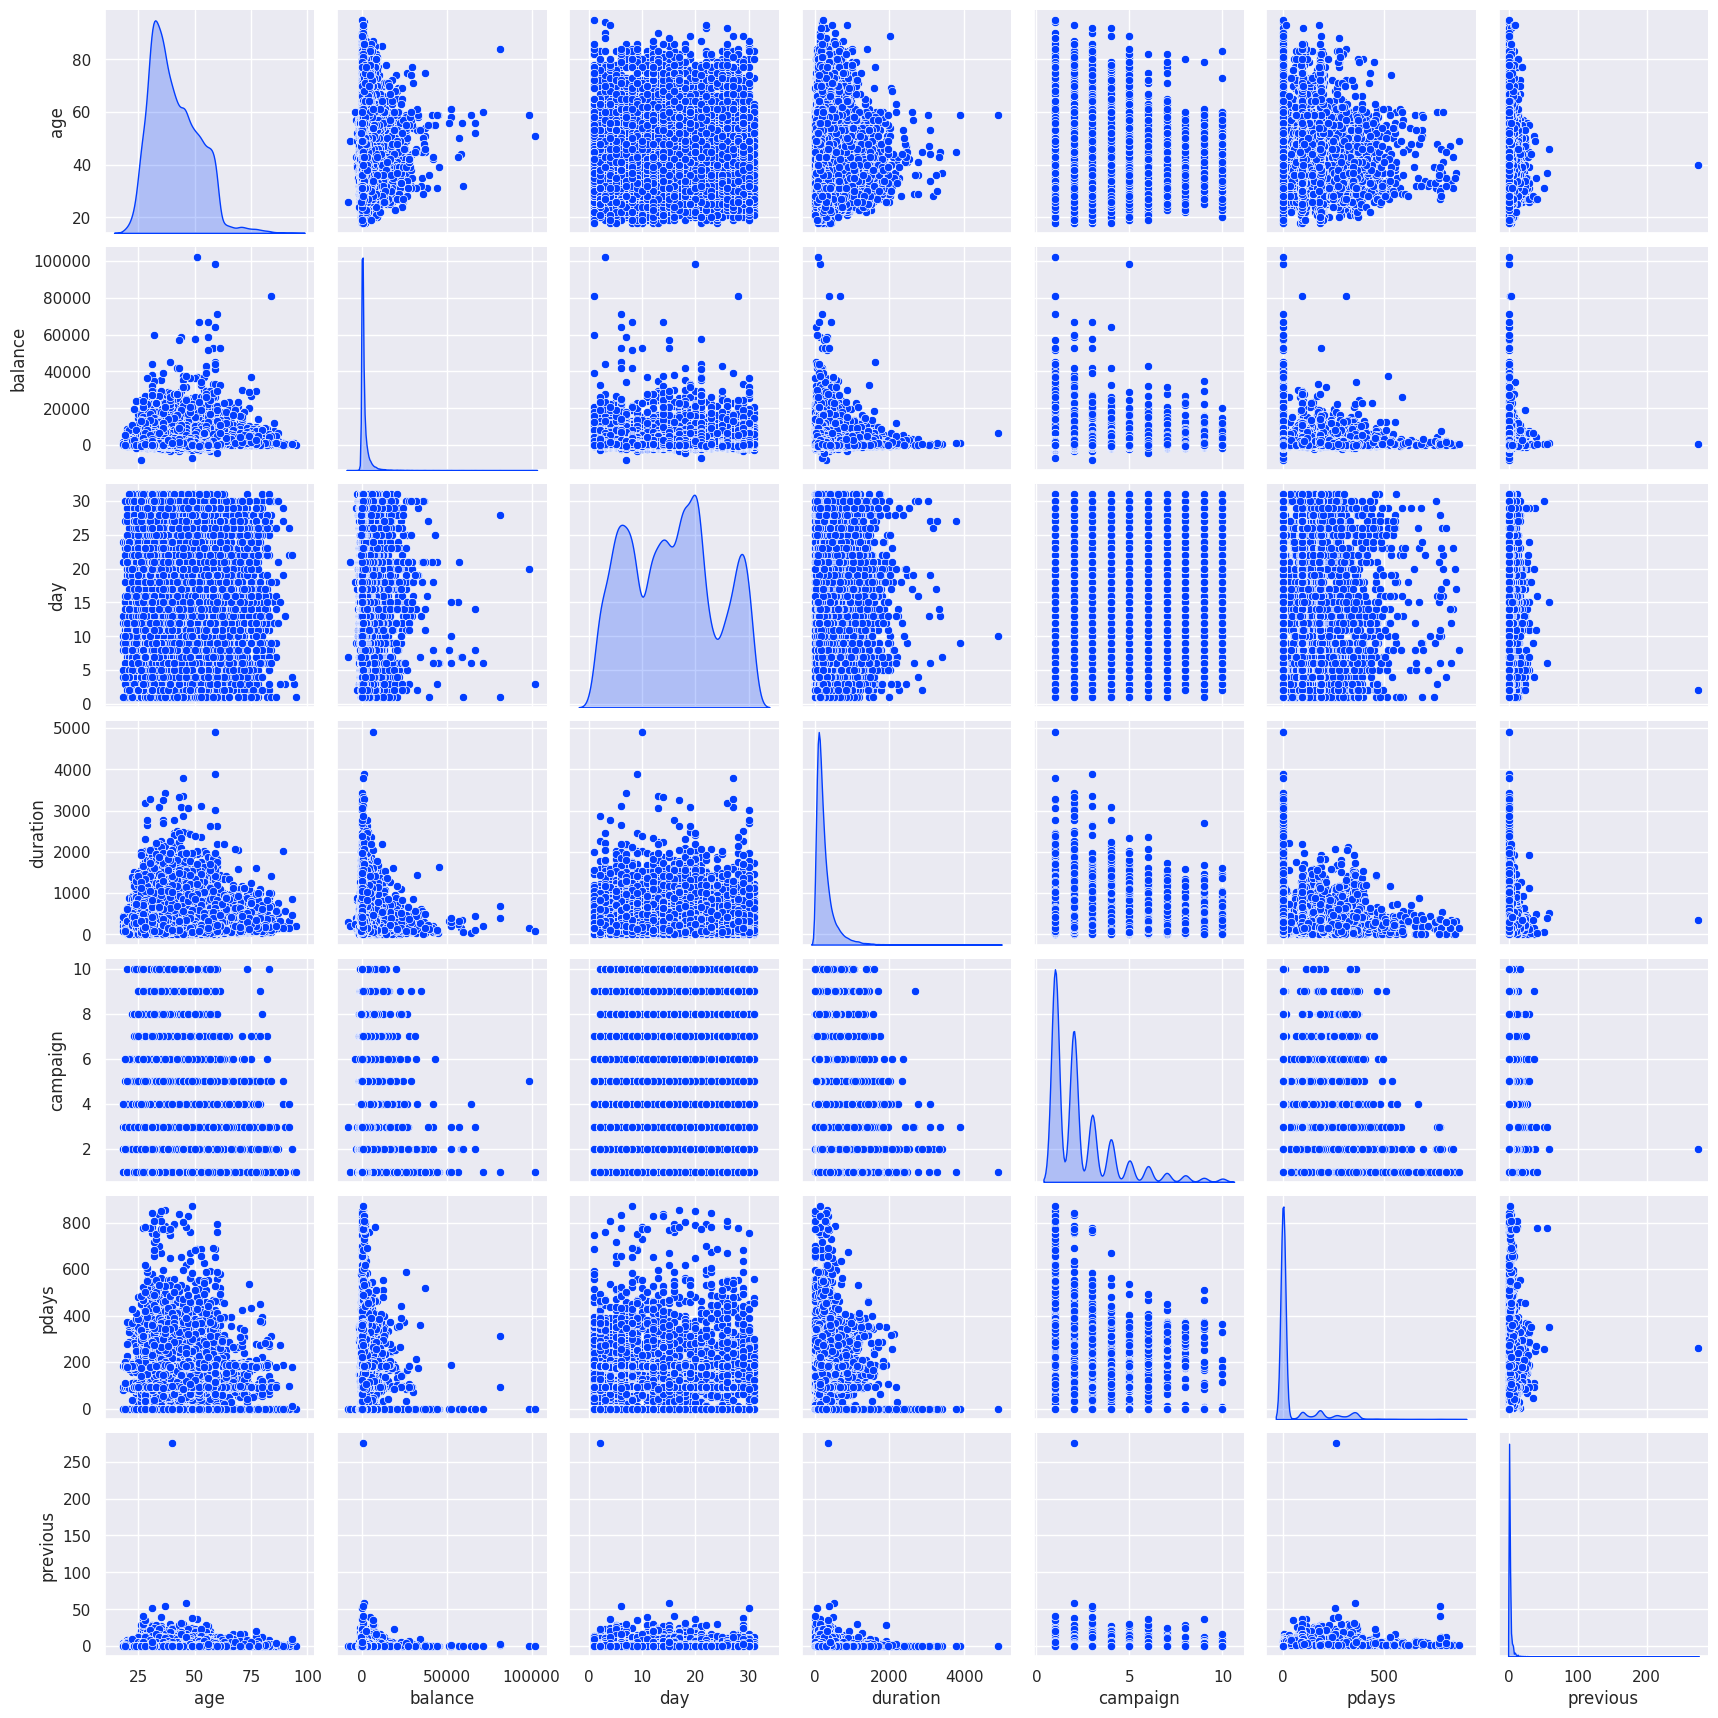

In [ ]:
plt.figure(figsize=(10, 8))
sns.pairplot(raw_df, diag_kind='kde')

<Figure size 1000x800 with 0 Axes>

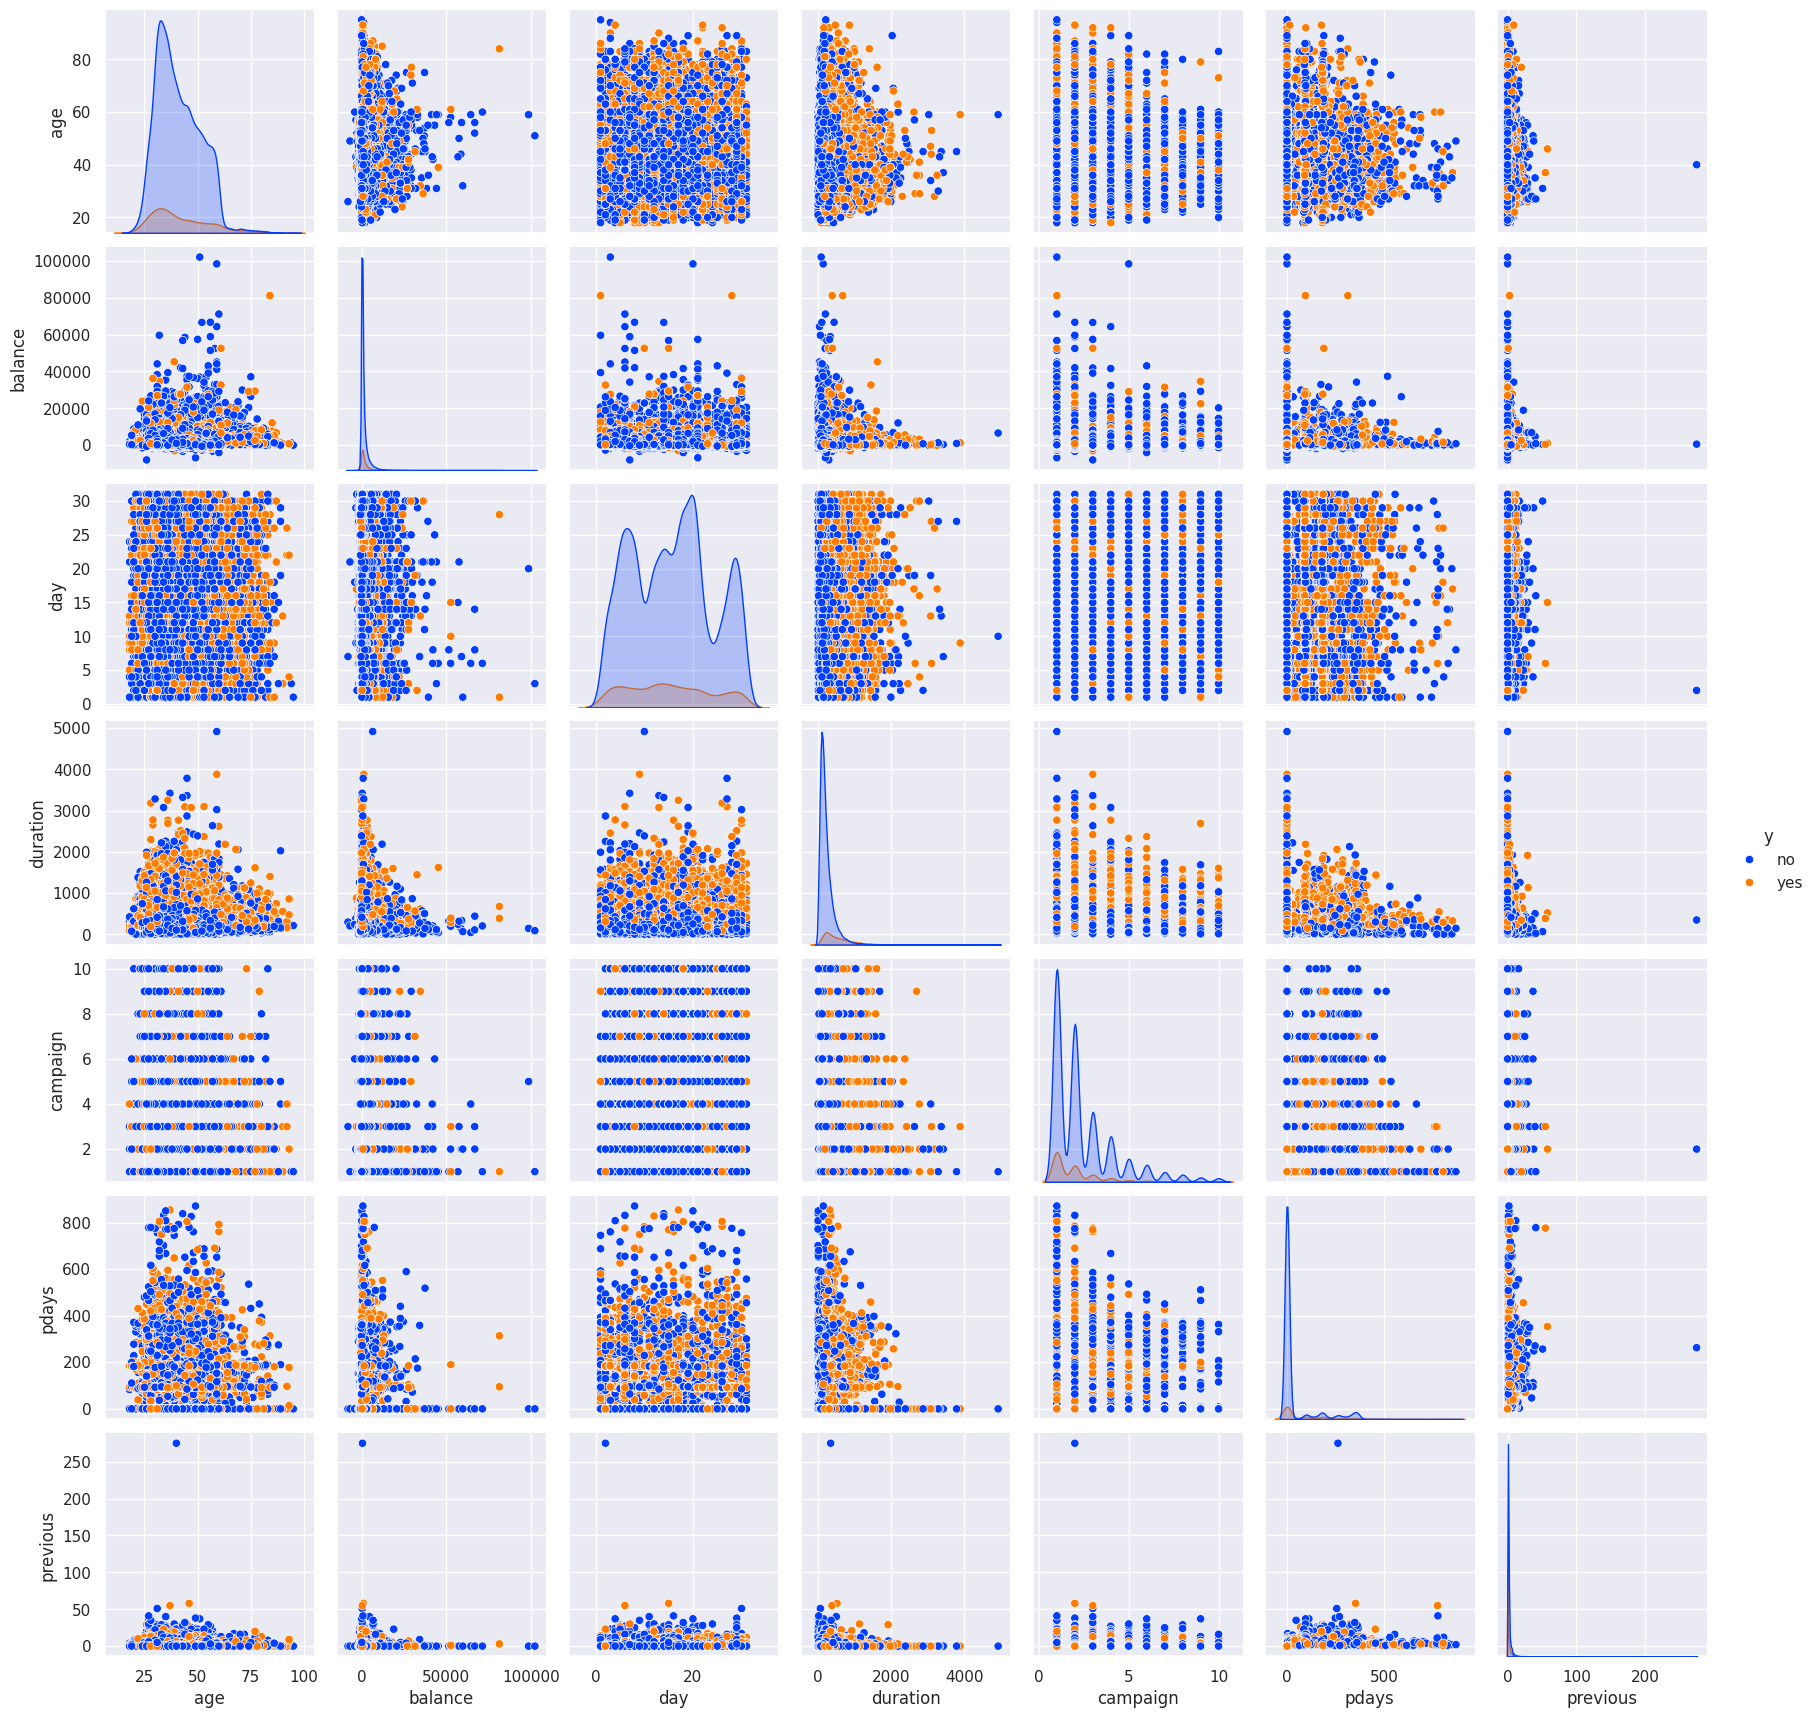

In [ ]:
plt.figure(figsize=(10, 8))
sns.pairplot(raw_df, diag_kind='kde', hue='y')

# Bivariate Analysis

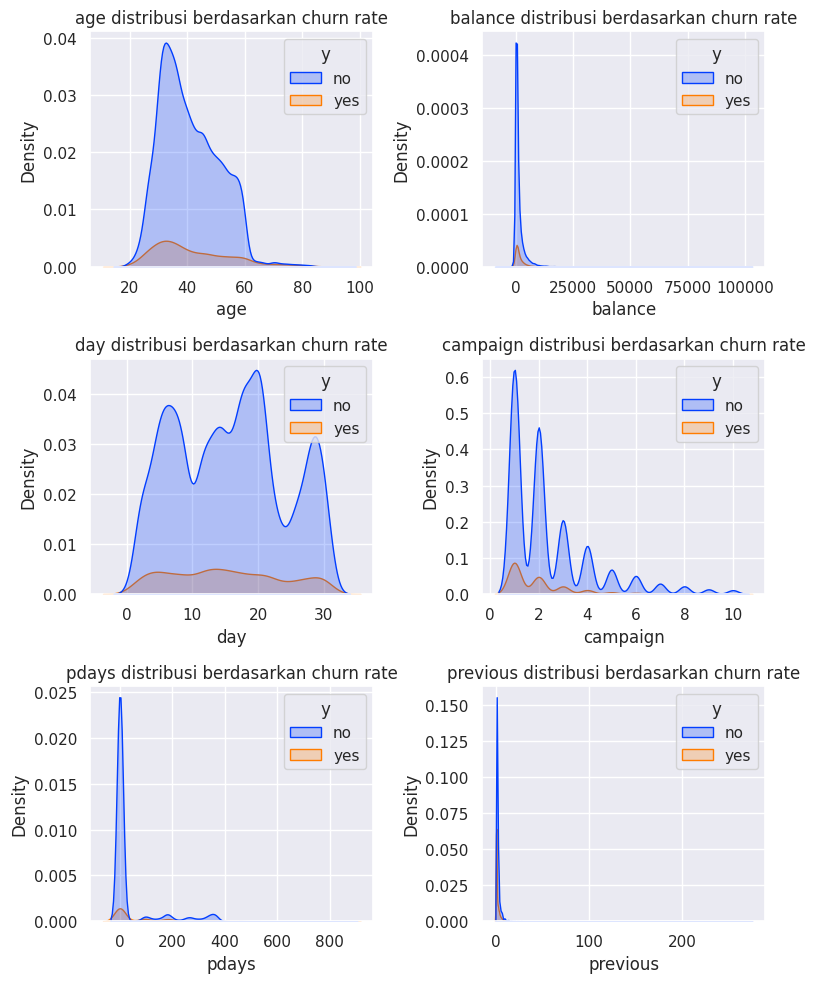

In [ ]:
plt.Figure(figsize=(30,12))
for i, column in enumerate(nums):
    plt.subplot(3,2, i+1)
    sns.kdeplot(data=raw_df, x=column, hue='y', fill=True)
    plt.title(f'{column} distribusi berdasarkan churn rate')
plt.tight_layout()
plt.show()

## raw df encoding

In [ ]:
raw_df_enco = raw_df.copy()

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in raw_df_enco.columns:
    if raw_df_enco[col].dtype == 'O':
        raw_df_enco[col] = le.fit_transform(raw_df_enco[col])

In [ ]:
raw_df_enco.sample(5)

age  job  marital  education  default  balance  housing  loan  contact  \
5753    31    4        1          1        0       89        1     0        2   
845     33    1        1          0        0      716        1     0        2   
25145   58    0        1          1        0     5680        0     1        0   
35843   50    4        2          2        0      709        1     0        0   
26457   30    9        2          2        0     3086        1     0        0   

       day  month  duration  campaign  pdays  previous  poutcome  y  
5753    26      8     167.0       1.0   -1.0       0.0         3  0  
845      7      8      83.0       3.0   -1.0       0.0         3  0  
25145   18      9     237.0       2.0   -1.0       0.0         3  0  
35843    8      8     207.0       1.0   -1.0       0.0         3  0  
26457   20      9     150.0       1.0   -1.0       0.0         3  0

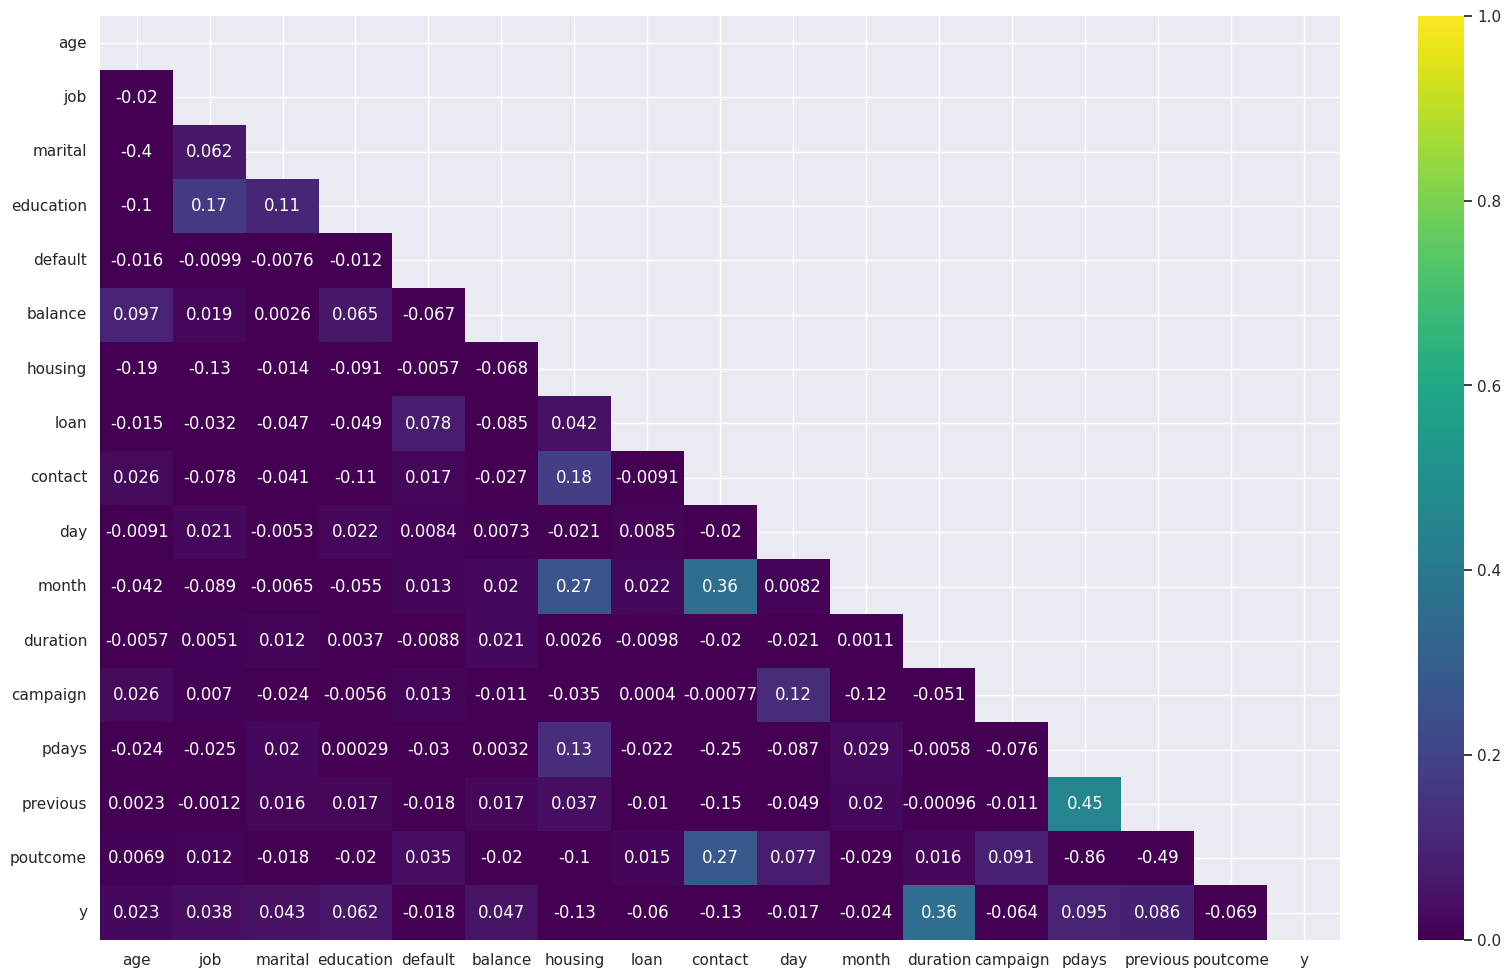

In [ ]:
plt.figure(figsize=(20, 12))
corr = raw_df_enco.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))
heatmap = sns.heatmap(corr, mask = mask, vmin = 0, vmax = 1, annot = True, cmap = 'viridis')

In [ ]:
raw_df_enco.corr().abs()['y'].sort_values(ascending=False)

y            1.000000
duration     0.356475
contact      0.132204
housing      0.128342
pdays        0.094962
previous     0.086033
poutcome     0.069260
campaign     0.064381
education    0.062321
loan         0.060386
balance      0.046998
marital      0.043458
job          0.037663
month        0.024384
age          0.022562
default      0.017860
day          0.017042
Name: y, dtype: float64